# Business Problem: 
***Get insights from the dataset of INX Future Inc., to find-out why the employees' Performance Index is not as per expectations and what can be done to improve the current situation.***

# Objective: 
- In this notebook we explore the Processed Data that we have transformed from Raw Data to gain a better understanding of different aspects of our target data.
- Here we use 'INX_Future_Inc_Employee_Performance_Processed_Data.xlsx and try perform **Exploratory Data Analysis**.

**Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods..**

### Why we need this?
- EDA hepls us to get insight of a data set,Understand the underlying structure and extract important parameters and relationships that hold between them.
- It's the EDA, that helps us to understand the underlying causes of declining Performance Ratins Index of Employees of  INX Future Inc  and what's the course correction to resolve the isssue.

**Steps in Exploratory Data Analysis**

Step 1 : Import the libraries

Step 2 : Import the Processed data-set

Step 3 : Descriptive Statistics

Step 4 : Analyse the Target Variable

Step 5 : Departmentwise Performance Analysis

Step 6 : Analysing some of important Variables with respect to Performance

Step 7 : Recommendations 

# Step 1 : Import the libraries

In [2]:
# Import the libraries
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #andas is for data manipulation and analysis. 
import matplotlib.pyplot as plt #Matplotlib is a Python 2D plotting library which produces publication quality figures.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

# Step 2 : Import the data-set

In [3]:
#pd.set_option('display.height', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


# Step 3 : Descriptive Statistics

In [4]:
# Save EmpNumber for later
Emp_Number = df.EmpNumber

In [5]:
df.drop("EmpNumber",axis=1, inplace = True) 

In [6]:
print(df.shape)

(1200, 27)


In [7]:
# There is about 85% of employees stayed and 15% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
Attrition_rate = df.Attrition.value_counts() / len(df)
Attrition_rate

No     0.851667
Yes    0.148333
Name: Attrition, dtype: float64

In [8]:
# Check the type of our features. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
EmpLastSalaryHikePercent        1200 non-null int64
Em

In [9]:
# Display the statistical overview of the employees
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [10]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.shape)
obj_df.head()

(1200, 8)


,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [11]:
num_df = df.select_dtypes(exclude=['object']).copy()
print(num_df.shape)
num_df.head()

(1200, 19)


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


## **key Observations:**
- The dataset contains 27 columns and 1200 observations
- There is about 85% of employees stayed and 15% of employees left.
- There are 19 columns that have numeric value and 8 have non-numeric

# Step 4 : Analyse the Target Variable

In [12]:
# There is about 73% of employees have Medium PerformanceRating 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
PerformanceRating_rate = (df.PerformanceRating.value_counts() / len(df))*100
PerformanceRating_rate

3    72.833333
2    16.166667
4    11.000000
Name: PerformanceRating, dtype: float64

In [13]:
df.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [14]:
# Overview summary of (PerformanceRating :---> 2 / 3 / 4)
PerformanceRating_Summary = df.groupby('PerformanceRating')
PerformanceRating_Summary.mean()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,,,,,,,,,,,
2,37.804124,9.835052,2.829897,1.582474,68.216495,2.716495,2.304124,2.752577,2.572165,15.072165,2.737113,12.752577,2.757732,2.634021,9.097938,5.788660,3.695876,5.350515
3,36.784897,9.137300,2.905034,2.911899,65.609840,2.743707,2.022883,2.723112,2.669336,14.427918,2.734554,11.076659,2.803204,2.731121,6.676201,4.006865,1.911899,3.860412
4,36.500000,8.371212,2.901515,3.083333,65.159091,2.674242,2.015152,2.765152,2.772727,20.704545,2.643939,10.916667,2.712121,2.992424,6.765152,3.977273,1.856061,3.893939


In [15]:
df.PerformanceRating.mean()

2.9483333333333333

In [16]:
#!pip install plotly
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
#import plotly.tools as tls

#### Visualising PerformanceRating_rate

In [17]:
data = [go.Bar(
            x=df["PerformanceRating"].value_counts().index.values,
            y= df["PerformanceRating"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

## **key Observations:**
  **Target Variable**:
- There are THREE Ratings given in PerformanceRating Index named as:- 2(Good),3(Excellent),4(Outstanding)
- No Single employee in any department has PerformanceRating of 1(Low)
- Of these THREE Ratings each Ratings accounts in term of total employees for:-1Good(16.6%),2Excellent(72.8%),3Outstanding(11%).
- Hence, one can see that 3(Excellent) Rating holds majority of the Rating.So, **we can say that 2Excellent(72.8%) PerformanceRating is going to be Majority Group here**
- Mean **'PerformanceRating'** of all the Employees of INX Future Inc. is 2.94 

# Employee Gender Analysis:

(array([0, 1]), <a list of 2 Text xticklabel objects>)

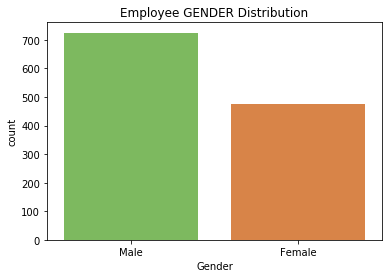

In [18]:
#Types of colors
color_types = ['#78C850','#F08030']
#['#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Gender', data=df, palette=color_types).set_title('Employee GENDER Distribution');
 
# Rotate x-labels
plt.xticks(rotation=0)

In [19]:
# Overview of (Gender Distribution)
Gender_rate = (df.Gender.value_counts() / len(df))*100
Gender_rate

Male      60.416667
Female    39.583333
Name: Gender, dtype: float64

In [20]:
# Overview  of (Gender Distribution)
Gender_Summary = df.groupby('Gender')
Gender_Summary.mean()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,37.368421,9.181053,2.922105,2.715789,65.926316,2.722105,2.136842,2.698947,2.776842,15.246316,2.684211,11.917895,2.875789,2.730526,7.311579,4.433684,2.280000,4.265263,2.949474
Male,36.623448,9.155862,2.873103,2.715862,66.017931,2.737931,2.022069,2.754483,2.591724,15.206897,2.751724,10.944828,2.726897,2.753103,6.924138,4.198621,2.137931,4.000000,2.947586


In [21]:
print('---Mean PerformanceRating---', Gender_Summary.mean()['PerformanceRating'])
print('\n')
print('---Mean Age---', Gender_Summary.mean()['Age'])
print('\n')
print('---MeanEmpEnvironmentSatisfaction---', Gender_Summary.mean()['EmpEnvironmentSatisfaction'])
print('\n')
print('---Mean EmpLastSalaryHikePercent---', Gender_Summary.mean()['EmpLastSalaryHikePercent'])
print('\n')
print('---Mean EmpWorkLifeBalance---', Gender_Summary.mean()['EmpWorkLifeBalance'])
print('\n')
print('---Mean EmpEducationLevel---', Gender_Summary.mean()['EmpEducationLevel'])
print('\n')
print('---Mean EmpEducationLevel---', Gender_Summary.mean()['EmpEducationLevel'])

---Mean PerformanceRating--- Gender
Female    2.949474
Male      2.947586
Name: PerformanceRating, dtype: float64


---Mean Age--- Gender
Female    37.368421
Male      36.623448
Name: Age, dtype: float64


---MeanEmpEnvironmentSatisfaction--- Gender
Female    2.715789
Male      2.715862
Name: EmpEnvironmentSatisfaction, dtype: float64


---Mean EmpLastSalaryHikePercent--- Gender
Female    15.246316
Male      15.206897
Name: EmpLastSalaryHikePercent, dtype: float64


---Mean EmpWorkLifeBalance--- Gender
Female    2.730526
Male      2.753103
Name: EmpWorkLifeBalance, dtype: float64


---Mean EmpEducationLevel--- Gender
Female    2.922105
Male      2.873103
Name: EmpEducationLevel, dtype: float64


---Mean EmpEducationLevel--- Gender
Female    2.922105
Male      2.873103
Name: EmpEducationLevel, dtype: float64


**key Observations:**
- Approx. 60% of Employee are Male and 40% are Female
- Mean Age of::-

Female    37.36 and Male      36.62
- There absolutly no difference between Mean PerformanceRating of Male and female.
- Overall,Female tends to slightly older than Male.
- More or less, there not much difference between attributes Of Male and Female.

# Step 5 : Department-wise Performance Analysis

**As per this project,we are required to analyse the Departmentwise Performance.**

In [22]:
data = [go.Bar(
            x=df['EmpDepartment'].value_counts().index.values,
            y= (df['EmpDepartment'].value_counts().values)
    )]

py.iplot(data, filename='basic-bar')

In [23]:
data = [go.Bar(
            x=df['EmpJobRole'].value_counts().index.values,
            y= df['EmpJobRole'].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

In [24]:
print(df.EmpJobRole.nunique())
df.EmpJobRole.unique()

19


array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

### **Departmental Statistics**

#### Key Observations:

**---Departments---**
- INX Future Inc. has total of **SIX Departments** and a total workforce of 1200 Employee.

- Clearly TOP 3 Departments that account for approx. 90% of total workforce of the INX Future Inc. are 
**'Sales'(31%), 'Development(30%) , and  'Research & Development'(28.6%)**

- Other 3 departments that account for approx. 10% of total workforce of the INX Future Inc. are 
**'Human Resources'(4.5%), 'Finance'(4%),and 'Data Science'(1.6%)** only

**----Employee JobRole----**
- There are total of 19 unique Employee JobRole.
- Both **'Data Science'(1.6%) and'Finance'(4%)** departments have **one JobRole** namely 'Data Scientist' and 'Finance Manager' repectively
- **''Development(30%)'** department has **six JobRoles** namely:- 'Developer','Senior Developer','Technical Architect', 'Business Analyst','Technical Lead', 'Delivery Manager'
- **'Research & Development'(28.6%)** department has total **8 JobRoles** namely:-'Manager', 'Developer','Senior Manager R&D', 'Laboratory Technician', 'Research Scientist','Healthcare Representative', 'Research Director', 'Manager R&D',
- ****'Human Resources'(4.5%)'** department has total **2 JobRoles** namely:-  'Manager','Human Resources'
- ****'Sales'(31%)** department  has total **3 JobRoles namely**:-'Sales Executive', 'Manager', 'Sales Representative'
- **TOP 3 JobRole** that accounts for about 50% of the  total workforce of the INX Future Inc. **'Sales Executive'(22.5%),'Developer(19.6%) and 'Manager R&D'(7.83%).** 

### Overall Performance of all Six Departments

In [113]:
#Checking  the Skewness vs Kurtosis of 'PerformanceRating'
print(df.PerformanceRating.skew())
print(df.PerformanceRating.kurt())

-0.07057642842376263
0.6744767114987464


In [114]:
df.PerformanceRating.mean()

2.9483333333333333

In [27]:
# Overview of (PerformanceRating :---> 2 / 3 / 4) by Departments
empdept = df.groupby('EmpDepartment')
empdept.mean()['PerformanceRating']

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [116]:
df['EmpDepartment'].value_counts().index.values

array(['Sales', 'Development', 'Research & Development',
       'Human Resources', 'Finance', 'Data Science'], dtype=object)

In [28]:
data = [go.Bar(
            x=df['EmpDepartment'].value_counts().index.values,
            y= empdept.mean()['PerformanceRating'],
    )]

py.iplot(data, filename='basic-bar')

#### Key Observations:
- Mean **'PerformanceRating'** of all the Employees of INX Future Inc. is 2.94 
- **'Data Science'(1.6%)** and **Development(30%)** are the only **Departments** with above mean **'PerformanceRating'** of (2.94)
- It is important to note here that **'Data Science'** and **'Research & Development'** accounts for (1.6%) and (28.6%) of the total worforce of the INX Future Inc. respectively.
- All the other four Deprtments has performed below the average **'PerformanceRating'** of (2.94).
- **'Finance'(4%)** has the least mean **'PerformanceRating'** of 2.77

**Rank of Department according to Mean 'PerformanceRating'**

*EmpDepartment*

1. Development               (3.085873)
2. Data Science              (3.050000)
3. Human Resources           (2.925926)
4. Research & Development    (2.921283)
5. Sales                     (2.860590)
6. Finance                   (2.775510)

## Performance Analysis Of Departments with respect to different factors/Variables

### 1. **Gender vs PerformanceRating vs Department**

In [29]:
df.head(1)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3


In [30]:
df.groupby(['EmpDepartment','Gender']).agg(['mean','count','median'])[['PerformanceRating','EmpWorkLifeBalance','EmpEducationLevel','Age']]

PerformanceRating               \
                                           mean count median   
EmpDepartment          Gender                                  
Data Science           Female          3.000000     8      3   
                       Male            3.083333    12      3   
Development            Female          3.098592   142      3   
                       Male            3.077626   219      3   
Finance                Female          2.681818    22      3   
                       Male            2.851852    27      3   
Human Resources        Female          3.058824    17      3   
                       Male            2.864865    37      3   
Research & Development Female          2.945736   129      3   
                       Male            2.906542   214      3   
Sales                  Female          2.840764   157      3   
                       Male            2.875000   216      3   

                              EmpWorkLifeBalance               \
                                            mean count median   
EmpDepartment          Gender                                   
Data Science           Female           2.375000     8    2.5   
                       Male             2.583333    12    3.0   
Development            Female           2.704225   142    3.0   
                       Male             2.675799   219    3.0   
Finance                Female           2.545455    22    3.0   
                       Male             2.777778    27    3.0   
Human Resources        Female           3.000000    17    3.0   
                       Male             2.891892    37    3.0   
Research & Development Female           2.682171   129    3.0   
                       Male             2.780374   214    3.0   
Sales                  Female           2.808917   157    3.0   
                       Male             2.787037   216    3.0   

                              EmpEducationLevel                     Age        \
                                           mean count median       mean count   
EmpDepartment          Gender                                                   
Data Science           Female          2.750000     8      3  38.125000     8   
                       Male            2.750000    12      2  37.916667    12   
Development            Female          2.985915   142      3  37.239437   142   
                       Male            2.767123   219      3  36.273973   219   
Finance                Female          3.227273    22      3  38.863636    22   
                       Male            2.925926    27      3  34.370370    27   
Human Resources        Female          3.000000    17      3  37.764706    17   
                       Male            3.000000    37      3  38.729730    37   
Research & Development Female          2.852713   129      3  38.031008   129   
                       Male            2.887850   214      3  37.140187   214   
Sales                  Female          2.878981   157      3  36.649682   157   
                       Male            2.944444   216      3  36.314815   216   

                                      
                              median  
EmpDepartment          Gender         
Data Science           Female   38.5  
                       Male     39.0  
Development            Female   36.0  
                       Male     35.0  
Finance                Female   38.0  
                       Male     34.0  
Human Resources        Female   39.0  
                       Male     38.0  
Research & Development Female   37.0  
                       Male     36.0  
Sales                  Female   35.0  
                       Male     35.0

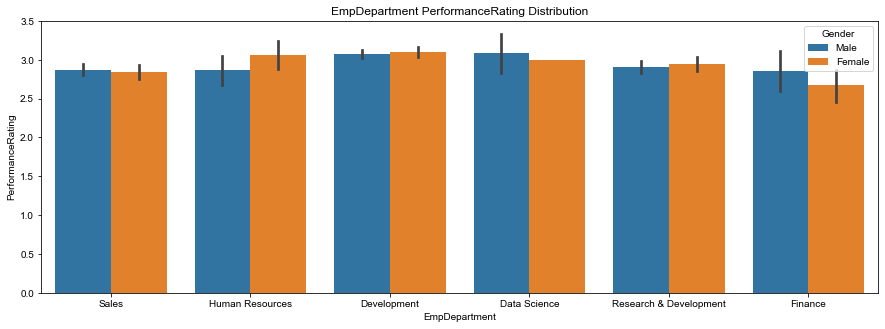

In [31]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="EmpDepartment",y='PerformanceRating', hue="Gender", data=df)
ax.set_title('EmpDepartment PerformanceRating Distribution');

sns.set(style="whitegrid")

#### Key Observations:
- In **'Finance'(4%)** deaprtment, Male outperforms the Female with considerablly slight margin. But opposite is True in case of  **'Human Resources(4.5%)'**  department. It is important to here that both these department  more or less have same share in company's total workforce
- In all other four depatments, both Male and Female performs in similar manner with repective to thier department's average  **'PerformanceRating'**

### 2. **EmpJobRole vs PerformanceRating vs Department**

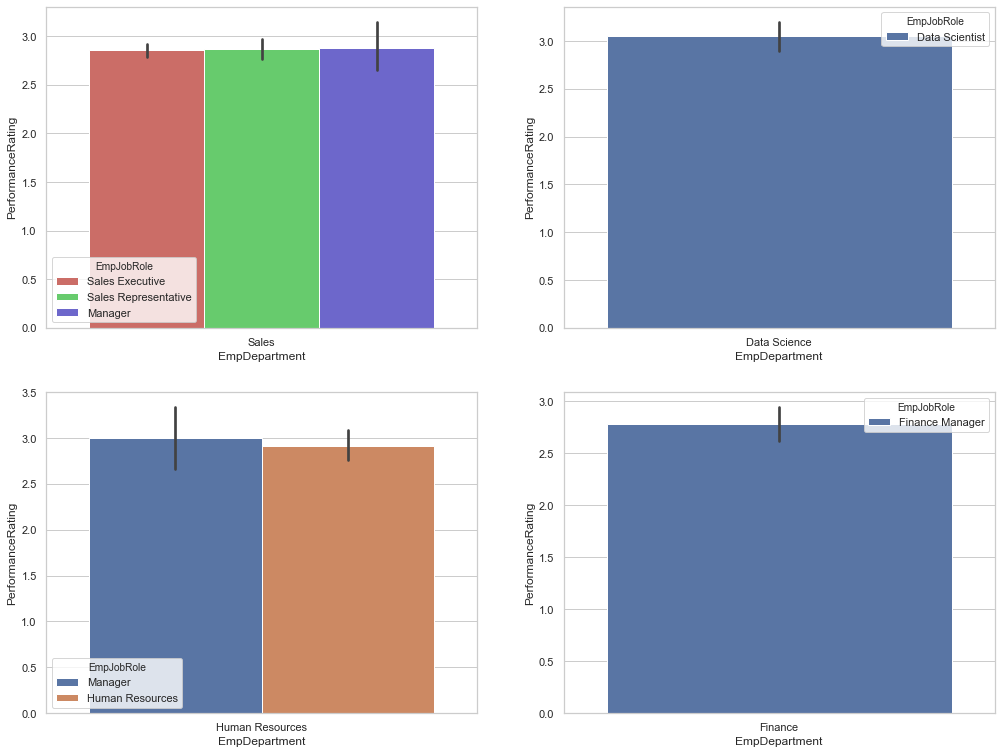

In [32]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

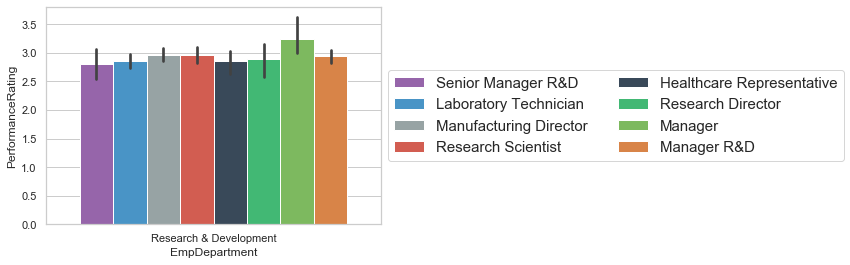

In [33]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'#78C850','#F08030']
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

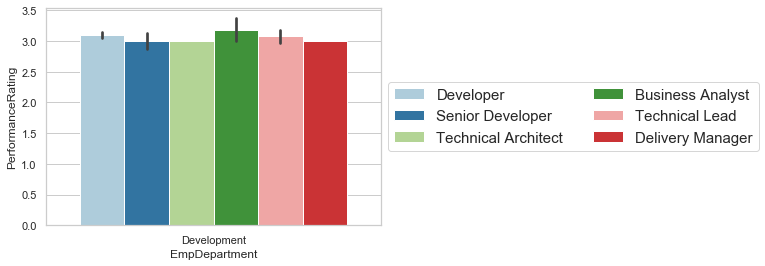

In [34]:
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

In [35]:
df.groupby(['EmpDepartment','EmpJobRole']).agg(['mean','count'])[['PerformanceRating','EmpWorkLifeBalance','EmpEducationLevel','Age','EmpEnvironmentSatisfaction']]

PerformanceRating        \
                                                              mean count   
EmpDepartment          EmpJobRole                                          
Data Science           Data Scientist                     3.050000    20   
Development            Business Analyst                   3.187500    16   
                       Delivery Manager                   3.000000    12   
                       Developer                          3.105932   236   
                       Senior Developer                   3.000000    52   
                       Technical Architect                3.000000     7   
                       Technical Lead                     3.078947    38   
Finance                Finance Manager                    2.775510    49   
Human Resources        Human Resources                    2.911111    45   
                       Manager                            3.000000     9   
Research & Development Healthcare Representative          2.848485    33   
                       Laboratory Technician              2.859375    64   
                       Manager                            3.250000     8   
                       Manager R&D                        2.936170    94   
                       Manufacturing Director             2.969697    33   
                       Research Director                  2.894737    19   
                       Research Scientist                 2.961039    77   
                       Senior Manager R&D                 2.800000    15   
Sales                  Manager                            2.882353    34   
                       Sales Executive                    2.855556   270   
                       Sales Representative               2.869565    69   

                                                 EmpWorkLifeBalance        \
                                                               mean count   
EmpDepartment          EmpJobRole                                           
Data Science           Data Scientist                      2.500000    20   
Development            Business Analyst                    3.062500    16   
                       Delivery Manager                    2.583333    12   
                       Developer                           2.711864   236   
                       Senior Developer                    2.615385    52   
                       Technical Architect                 2.714286     7   
                       Technical Lead                      2.500000    38   
Finance                Finance Manager                     2.673469    49   
Human Resources        Human Resources                     2.933333    45   
                       Manager                             2.888889     9   
Research & Development Healthcare Representative           2.757576    33   
                       Laboratory Technician               2.703125    64   
                       Manager                             3.250000     8   
                       Manager R&D                         2.755319    94   
                       Manufacturing Director              2.666667    33   
                       Research Director                   2.894737    19   
                       Research Scientist                  2.714286    77   
                       Senior Manager R&D                  2.666667    15   
Sales                  Manager                             2.852941    34   
                       Sales Executive                     2.781481   270   
                       Sales Representative                2.826087    69   

                                                 EmpEducationLevel        \
                                                              mean count   
EmpDepartment          EmpJobRole                                          
Data Science           Data Scientist                     2.750000    20   
Development            Business Analyst                   2.937500    1

#### Key Observations:
- One strinking thing to note here is that, even both the **Development(30%)** and **''Research & Development'(28.6%) '** deparments have more or less equal number of JobRole and equivalent share of Employees in total workforce of the INX Future Inc.  **Development(30%)** department performs way ahead of **''Research & Development'(28.6%) '** department.
- Hence it can be inferred that **no correlation between the number of EmpJobRole & workforce share one department has and its performance ratings**.
- In **''Research & Development'(28.6%) '** department it very sparkling to see that collectively,employees those have EmpJobRole	 **Manager** are performing even above all other department's EmpJobRoles.

### 3.**Attrition vs PerformanceRating vs Department**

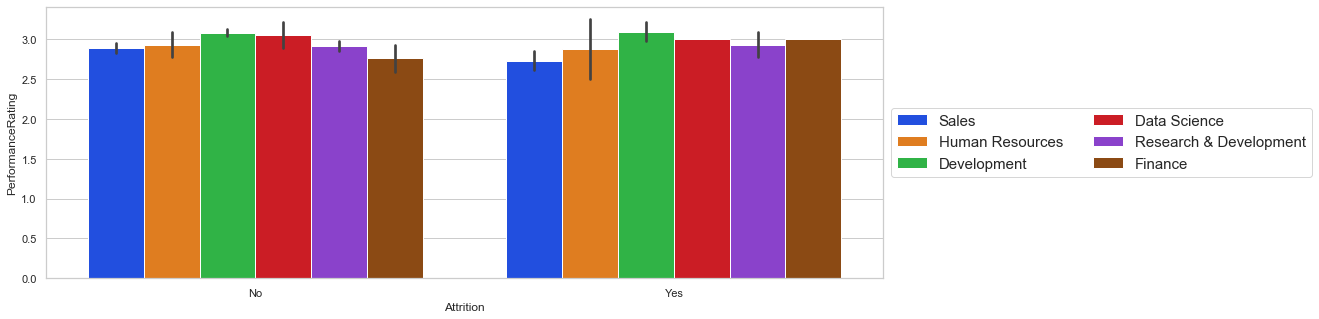

In [36]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='bright')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

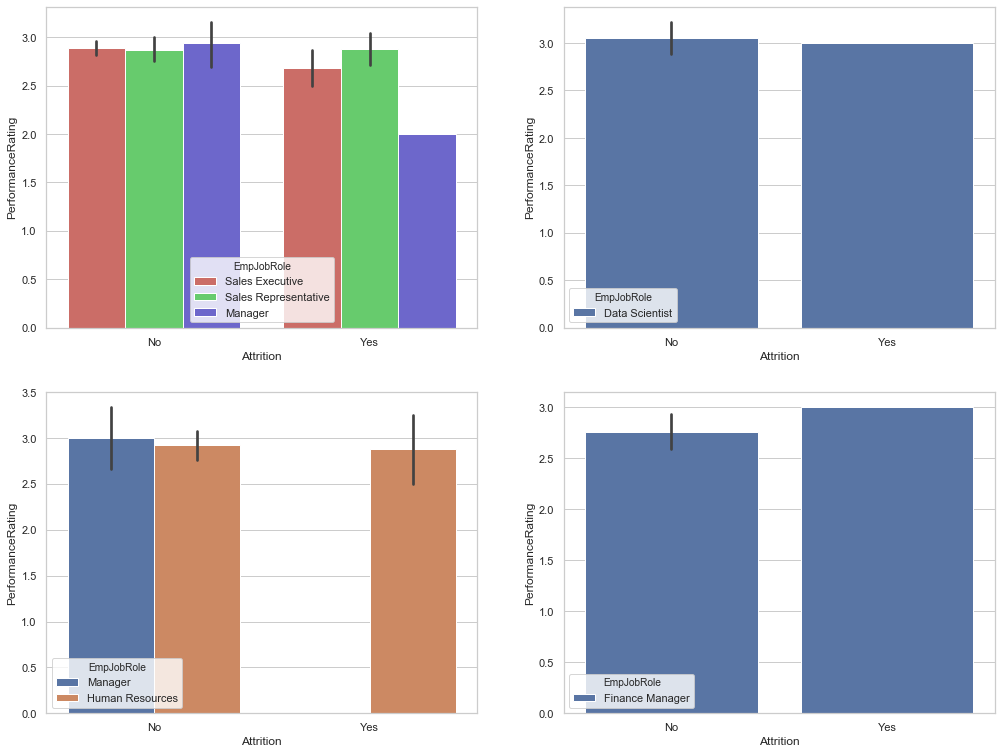

In [37]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])




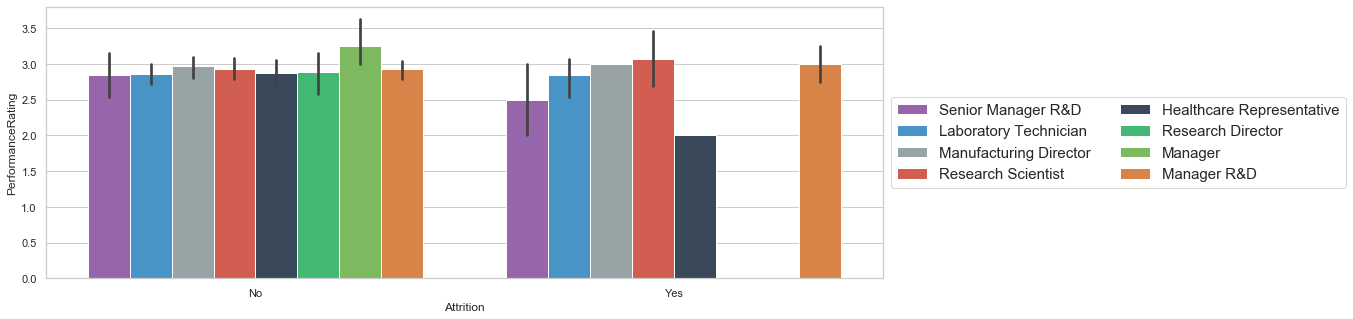

In [38]:
f, ax = plt.subplots(figsize=(15, 5))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'#78C850','#F08030']
sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

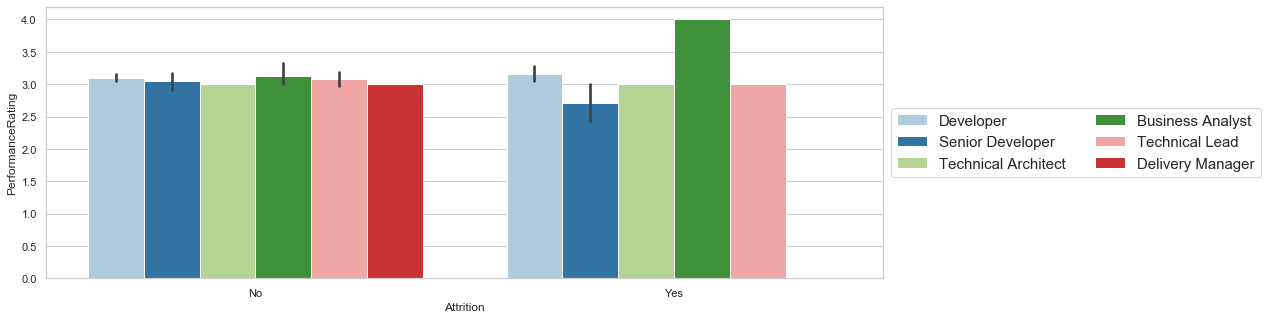

In [39]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Attrition',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

In [40]:
df.groupby(['EmpDepartment','Attrition']).agg(['mean','count'])[['PerformanceRating','EmpWorkLifeBalance','EmpEnvironmentSatisfaction']]

PerformanceRating       EmpWorkLifeBalance  \
                                              mean count               mean   
EmpDepartment          Attrition                                              
Data Science           No                 3.055556    18           2.500000   
                       Yes                3.000000     2           2.500000   
Development            No                 3.083871   310           2.709677   
                       Yes                3.098039    51           2.549020   
Finance                No                 2.760870    46           2.652174   
                       Yes                3.000000     3           3.000000   
Human Resources        No                 2.934783    46           2.913043   
                       Yes                2.875000     8           3.000000   
Research & Development No                 2.919732   299           2.769231   
                       Yes                2.931818    44           2.568182   
Sales                  No                 2.891089   303           2.825083   
                       Yes                2.728571    70           2.671429   

                                       EmpEnvironmentSatisfaction        
                                 count                       mean count  
EmpDepartment          Attrition                                         
Data Science           No           18                   3.000000    18  
                       Yes           2                   2.500000     2  
Development            No          310                   2.764516   310  
                       Yes          51                   2.372549    51  
Finance                No           46                   2.782609    46  
                       Yes           3                   3.666667     3  
Human Resources        No           46                   2.717391    46  
                       Yes           8                   2.125000     8  
Research & Development No          299                   2.822742   299  
                       Yes          44                   2.454545    44  
Sales                  No          303                   2.722772   303  
                       Yes          70                   2.342857    70

In [41]:
df.groupby(['EmpDepartment','Attrition','EmpJobRole']).agg(['mean','count'])[['PerformanceRating','EmpWorkLifeBalance','EmpEnvironmentSatisfaction']]

PerformanceRating  \
                                                                        mean   
EmpDepartment          Attrition EmpJobRole                                    
Data Science           No        Data Scientist                     3.055556   
                       Yes       Data Scientist                     3.000000   
Development            No        Business Analyst                   3.133333   
                                 Delivery Manager                   3.000000   
                                 Developer                          3.096939   
                                 Senior Developer                   3.044444   
                                 Technical Architect                3.000000   
                                 Technical Lead                     3.081081   
                       Yes       Business Analyst                   4.000000   
                                 Developer                          3.150000   
                                 Senior Developer                   2.714286   
                                 Technical Architect                3.000000   
                                 Technical Lead                     3.000000   
Finance                No        Finance Manager                    2.760870   
                       Yes       Finance Manager                    3.000000   
Human Resources        No        Human Resources                    2.918919   
                                 Manager                            3.000000   
                       Yes       Human Resources                    2.875000   
Research & Development No        Healthcare Representative          2.875000   
                                 Laboratory Technician              2.862745   
                                 Manager                            3.250000   
                                 Manager R&D                        2.926829   
                                 Manufacturing Director             2.966667   
                                 Research Director                  2.894737   
                                 Research Scientist                 2.937500   
                                 Senior Manager R&D                 2.846154   
                       Yes       Healthcare Representative          2.000000   
                                 Laboratory Technician              2.846154   
                                 Manager R&D                        3.000000   
                                 Manufacturing Director             3.000000   
                                 Research Scientist                 3.076923   
                                 Senior Manager R&D                 2.500000   
Sales                  No        Manager                            2.937500   
                                 Sales Executive                    2.889381   
                                 Sales Representative               2.866667   
                       Yes       Manager                            2.000000   
                                 Sales Executive                    2.681818   
                                 Sales Representative               2.875000   

                                                                  \
                                                           count   
EmpDepartment          Attrition EmpJobRole                        
Data Science           No        Data Scientist               18   
                       Yes       Data Scientist                2   
Development            No        Business Analyst             15   
                                 Delivery Manager             12   
                                 Developer                   196   
                                 Senior Developer             45   
                                 Technical Architect           5   
                                 Technical Lead               37   
                       Yes    

#### Key Observations:
- **TOP 3 Departments** that account for approx **90%** of total workforce of the INX Future Inc. namely (**'Sales Dept'(31%), 'Development(30%) , 'Research & Development'(28.6%)**) have Attrition rate of 23.1%, 16.4% and 14.7% resp. And in all these dept. there was **no much big difference between Emplpyee's performance and wheather the Emplpyee left the company or not**
- Offcourse, in some cases of EmpJobRole, it may apperars that higher performers are leaving but there Attrition rate is very low and can be treated as exception.
- We don't find any concrete pattern that says that Employee who leaving the are higher performer.

### 4. **EmpEnvironmentSatisfaction vs PerformanceRating vs Department**
- There are Five Ratings given in  EmpEnvironmentSatisfaction Index namely:- 1(Low),2(Medium),3(High),4(Very High)
- Of these Five Ratings each Ratings in term total employee's workforce  accounts for are:- Low(5.3%),Medium(24.5%),High(60.6%),Very High(9.6%)


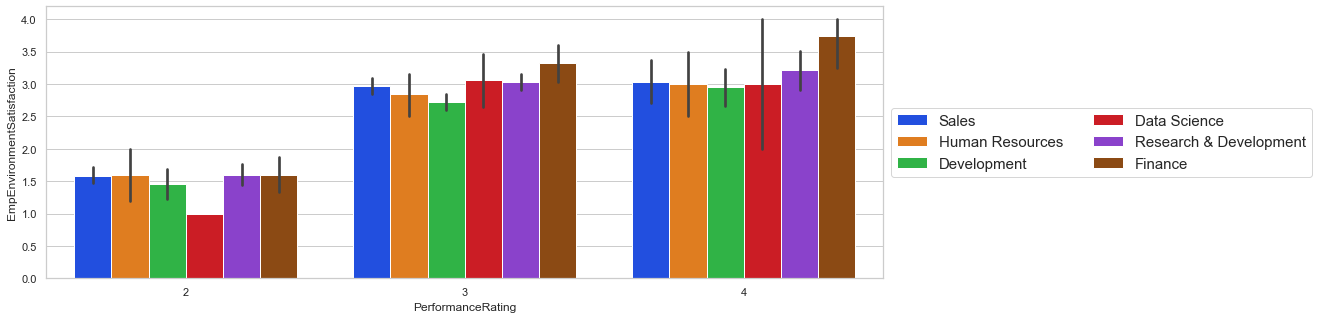

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpEnvironmentSatisfaction',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='bright')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

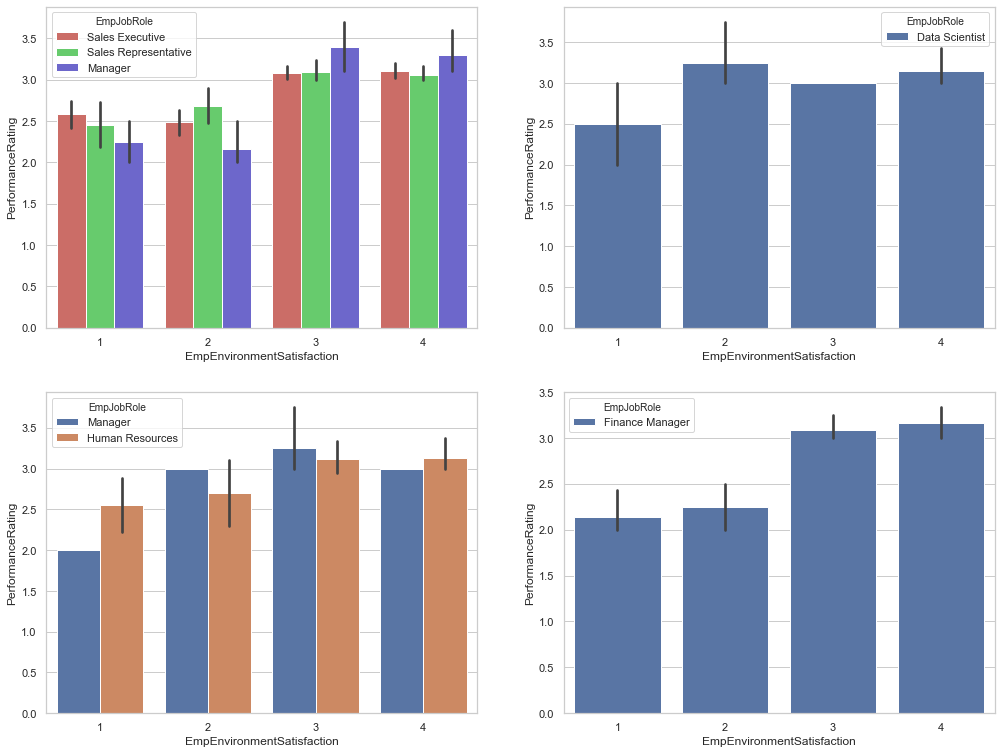

In [43]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])


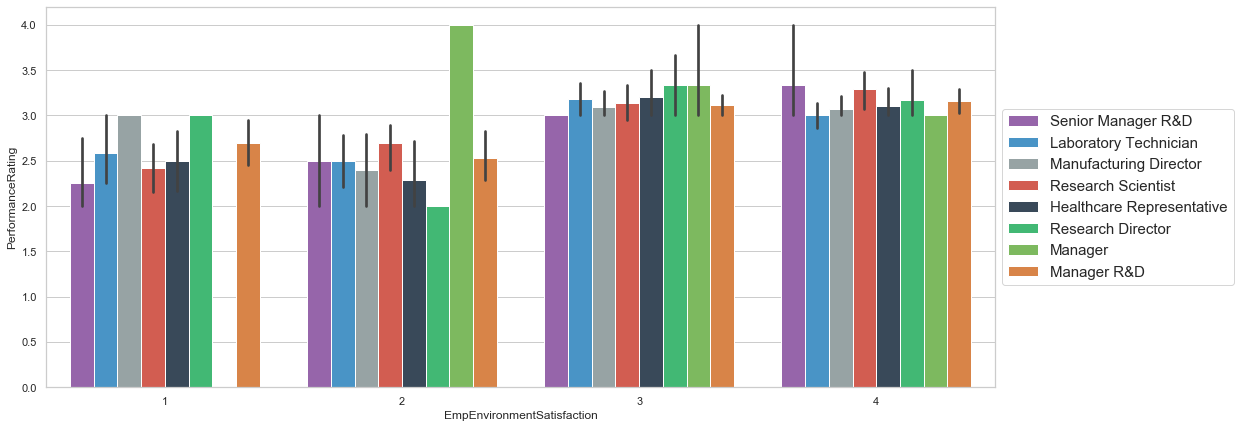

In [44]:
f, ax = plt.subplots(figsize=(17, 7))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'#78C850','#F08030']
sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

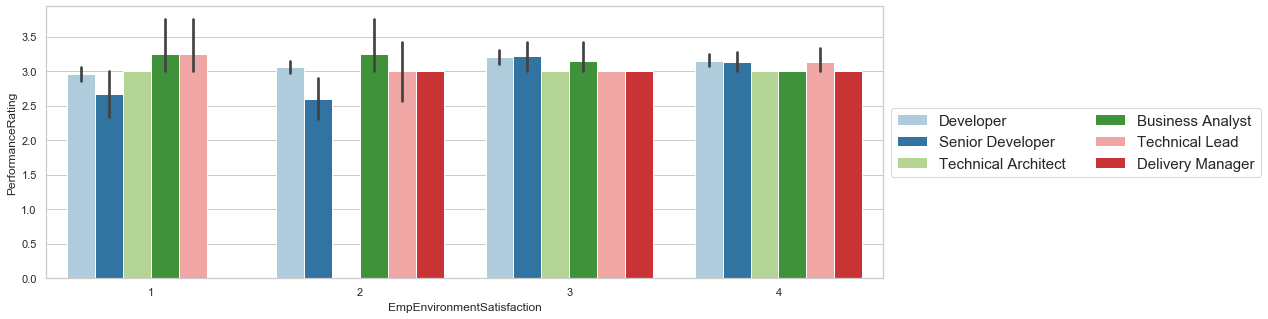

In [45]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction Distribution - Attrition V.S. No Attrition')

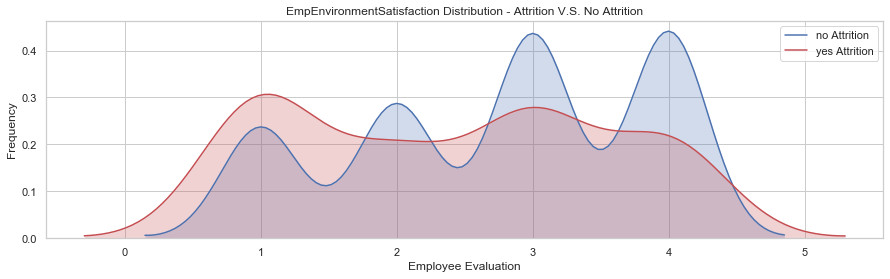

In [46]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'EmpEnvironmentSatisfaction'] , color='b',shade=True,label='no Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'EmpEnvironmentSatisfaction'] , color='r',shade=True, label='yes Attrition')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('EmpEnvironmentSatisfaction Distribution - Attrition V.S. No Attrition')

In [47]:
df.EmpEnvironmentSatisfaction.mean()

2.7158333333333333

In [48]:
df.groupby(['EmpDepartment']).agg(['mean','count'])[['EmpEnvironmentSatisfaction','PerformanceRating']]

EmpEnvironmentSatisfaction       PerformanceRating  \
                                             mean count              mean   
EmpDepartment                                                               
Data Science                             2.950000    20          3.050000   
Development                              2.709141   361          3.085873   
Finance                                  2.836735    49          2.775510   
Human Resources                          2.629630    54          2.925926   
Research & Development                   2.775510   343          2.921283   
Sales                                    2.651475   373          2.860590   

                              
                       count  
EmpDepartment                 
Data Science              20  
Development              361  
Finance                   49  
Human Resources           54  
Research & Development   343  
Sales                    373

In [49]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])

Age       DistanceFromHome  \
                                               mean count             mean   
PerformanceRating EmpDepartment                                              
2                 Data Science            40.000000     1         2.000000   
                  Development             35.153846    13        10.615385   
                  Finance                 39.466667    15        14.733333   
                  Human Resources         39.100000    10         4.500000   
                  Research & Development  38.014706    68         9.691176   
                  Sales                   37.574713    87         9.689655   
3                 Data Science            38.294118    17         9.764706   
                  Development             36.927632   304         8.953947   
                  Finance                 34.900000    30        10.800000   
                  Human Resources         38.368421    38         9.947368   
                  Research & Development  37.282051   234         9.064103   
                  Sales                   36.031873   251         9.063745   
4                 Data Science            34.500000     2        12.500000   
                  Development             35.204545    44         7.113636   
                  Finance                 36.000000     4         9.250000   
                  Human Resources         37.666667     6         7.500000   
                  Research & Development  37.682927    41         9.414634   
                  Sales                   36.714286    35         8.542857   

                                               EmpEducationLevel        \
                                         count              mean count   
PerformanceRating EmpDepartment                                          
2                 Data Science               1          2.000000     1   
                  Development               13          2.076923    13   
                  Finance                   15          3.200000    15   
                  Human Resources           10          3.000000    10   
                  Research & Development    68          2.720588    68   
                  Sales                     87          2.954023    87   
3                 Data Science              17          2.823529    17   
                  Development              304          2.878289   304   
                  Finance                   30          3.066667    30   
                  Human Resources           38          3.052632    38   
                  Research & Development   234          2.923077   234   
                  Sales                    251          2.884462   251   
4                 Data Science               2          2.500000     2   
                  Development               44          2.909091    44   
                  Finance                    4          2.500000     4   
                  Human Resources            6          2.666667     6   
                  Research & Development    41          2.853659    41   
                  Sales                     35          3.057143    35   

                                         EmpEnvironmentSatisfaction        \
                                                               mean count   
PerformanceRating EmpDepartment                                             
2                 Data Science                             1.000000     1   
                  Development                              1.461538    13   
                  Finance                                  1.600000    15   
                  Human Resources                          1.600000    10   
                  Research & Development                   1.602941    68   
                  Sales                                    1.586207    87   
3                 Data Science                             3.058824    17   
                  Development                              2.726974   304   
       

#### Key Observations:
- Mean **'EmpEnvironmentSatisfaction'** of all the Employees of INX Future Inc. is 2.71
- Except  **'Human Resources'(4.5%)** and **'Sales Dept'(31%)** (ingnoring the very minute difference in 'Development(30%) department )all other Departments have above Average **'EmpEnvironmentSatisfaction'**.
- **'Finance'(4%)** department is seen to have the highest mean **EmpEnvironmentSatisfaction** rating in all of the three Ratings given in PerformanceRating Index.(There is something definitly very good perception by the Employees of this dept. about their work environment, which can be replicated to other department as well.This department is also have the second highest mean **EmpEnvironmentSatisfaction** rating overall after **'Data Science'(1.6%)**.)
- **'Data Science'(1.6%)** department is the clear winner here with mean **'EmpEnvironmentSatisfaction'** rating of 2.95 and since its also the one of the top performing department , So clearly **there is POSITIVE correlation between EmpEnvironmentSatisfaction and PerformanceRating**
- One big clear takeaway this analysis is that as the **PerformanceRating** of all the departments climbs from 1,Good(16.6%) to 2,Excellent(72.8%) and then to 3,Outstanding(11%)  among all "EmpJobRole", **'EmpEnvironmentSatisfaction'** rating also climbs along with it.
- Employees with low **'EmpEnvironmentSatisfaction'** tend to leave the company more.
- Employees with high (greater than 2 Ratings)**'EmpEnvironmentSatisfaction'** tend to leave the company less.
- Employee's **'EmpEnvironmentSatisfaction'** Ratings also determines wheather one leave the company or not.

### 5.**EmpWorkLifeBalance vs  PerformanceRating vs Department**
- There are Five Ratings given in  EmpWorkLifeBalance namely:- 1(Bad),2(Good),3(Better),4(Best)
- Of these Five Ratings each Ratings accounts in term of total employess are:- Bad(19.1%),Good(20.1%),Bettter(30.6%),Best(30%)

In [50]:
df.groupby(['EmpDepartment']).agg(['mean','count'])[['EmpWorkLifeBalance','PerformanceRating']]

EmpWorkLifeBalance       PerformanceRating      
                                     mean count              mean count
EmpDepartment                                                          
Data Science                     2.500000    20          3.050000    20
Development                      2.686981   361          3.085873   361
Finance                          2.673469    49          2.775510    49
Human Resources                  2.925926    54          2.925926    54
Research & Development           2.743440   343          2.921283   343
Sales                            2.796247   373          2.860590   373

In [51]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['EmpWorkLifeBalance']]

EmpWorkLifeBalance      
                                                       mean count
PerformanceRating EmpDepartment                                  
2                 Data Science                     3.000000     1
                  Development                      2.769231    13
                  Finance                          2.533333    15
                  Human Resources                  2.700000    10
                  Research & Development           2.558824    68
                  Sales                            2.678161    87
3                 Data Science                     2.411765    17
                  Development                      2.661184   304
                  Finance                          2.700000    30
                  Human Resources                  2.947368    38
                  Research & Development           2.739316   234
                  Sales                            2.800797   251
4                 Data Science                     3.000000     2
                  Development                      2.840909    44
                  Finance                          3.000000     4
                  Human Resources                  3.166667     6
                  Research & Development           3.073171    41
                  Sales                            3.057143    35

In [52]:
df.groupby(['PerformanceRating','EmpDepartment',"EmpJobRole"]).agg(['mean','count'])[['EmpWorkLifeBalance']]

EmpWorkLifeBalance  \
                                                                                 mean   
PerformanceRating EmpDepartment          EmpJobRole                                     
2                 Data Science           Data Scientist                      3.000000   
                  Development            Developer                           2.500000   
                                         Senior Developer                    3.000000   
                                         Technical Lead                      3.000000   
                  Finance                Finance Manager                     2.533333   
                  Human Resources        Human Resources                     2.666667   
                                         Manager                             3.000000   
                  Research & Development Healthcare Representative           2.625000   
                                         Laboratory Technician               2.500000   
                                         Manager R&D                         2.705882   
                                         Manufacturing Director              2.333333   
                                         Research Director                   2.400000   
                                         Research Scientist                  2.470588   
                                         Senior Manager R&D                  2.750000   
                  Sales                  Manager                             2.818182   
                                         Sales Executive                     2.640625   
                                         Sales Representative                2.750000   
3                 Data Science           Data Scientist                      2.411765   
                  Development            Business Analyst                    3.076923   
                                         Delivery Manager                    2.583333   
                                         Developer                           2.688442   
                                         Senior Developer                    2.550000   
                                         Technical Architect                 2.714286   
                                         Technical Lead                      2.484848   
                  Finance                Finance Manager                     2.700000   
                  Human Resources        Human Resources                     2.967742   
                                         Manager                             2.857143   
                  Research & Development Healthcare Representative           2.772727   
                                         Laboratory Technician               2.711111   
                                         Manager                             3.166667   
                                         Manager R&D                         2.712121   
                                         Manufacturing Director              2.714286   
                                         Research Director                   2.909091   
                                         Research Scientist                  2.739130   
                                         Senior Manager R&D                  2.600000   
                  Sales                  Manager                             2.812500   
                                         Sales Executive                     2.790055   
                                         Sales Representative                2.833333   
4                 Data Science           Data Scientist                      3.000000   
                  Development            Business Analyst                    3.000000   
                                         Developer                           2.903226   
                                         Senior Developer                    2.666667   
                                         Technical Lead       

In [53]:
df.EmpWorkLifeBalance.mean()

2.7441666666666666

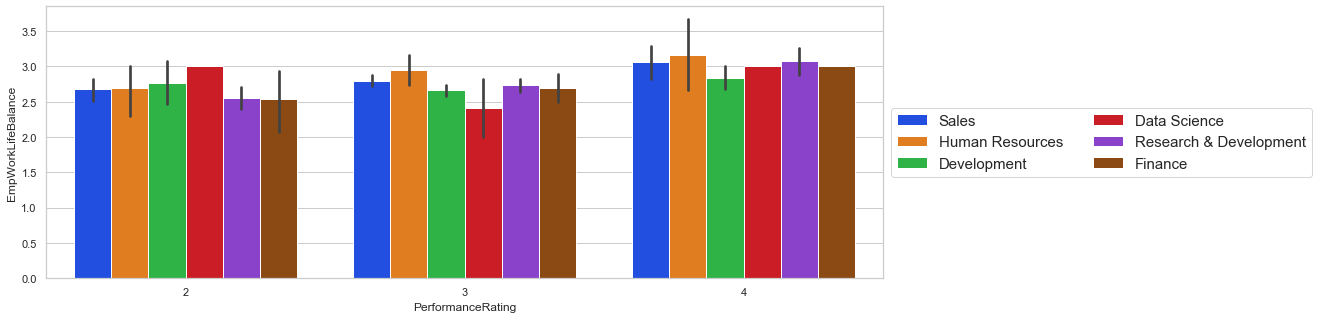

In [54]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='bright')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

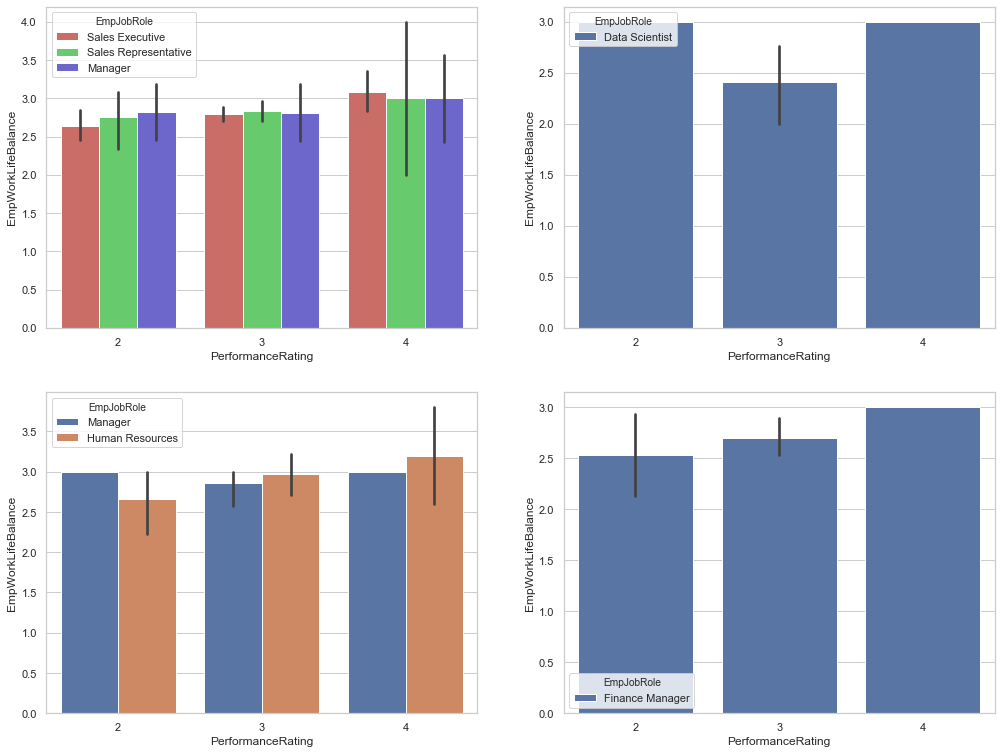

In [55]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])


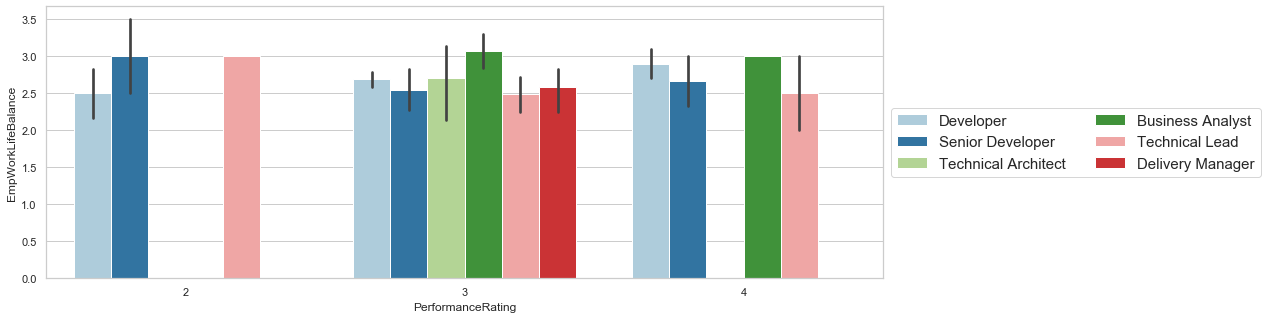

In [56]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

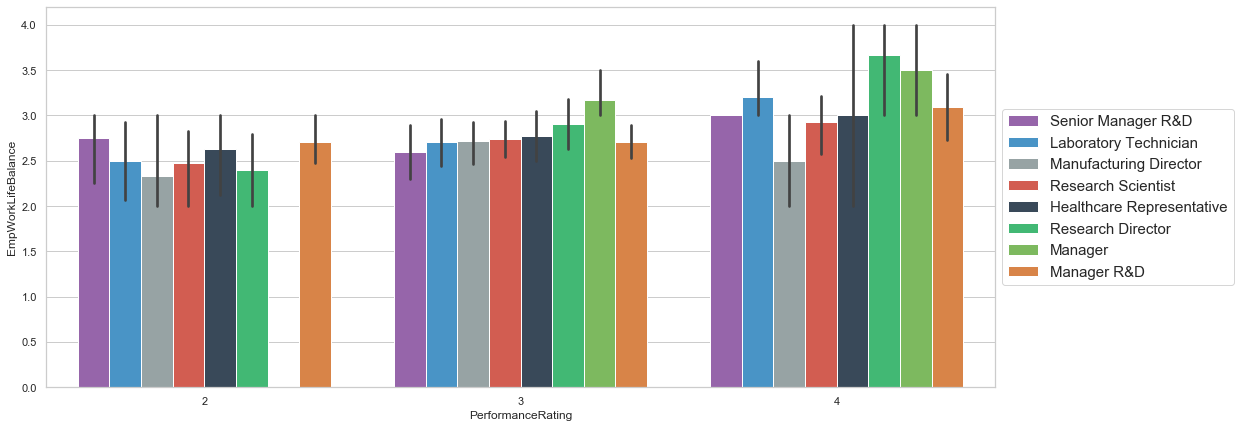

In [57]:
f, ax = plt.subplots(figsize=(17, 7))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'#78C850','#F08030']
sns.barplot(y='EmpWorkLifeBalance',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

#### Key Observations:
- Mean **'EmpWorkLifeBalance'** of all the Employees of INX Future Inc. is 2.7
- Although **'Data Science'(1.6%)** department is one of the TOP two performing dept but has the least mean EmpWorkLifeBalance(2.50).This is not as expected as HIGH Performers are genrally have HIGH EmpWorkLifeBalance.Similar trend is seen with the **Development Dept(30%)**. This can be explained as, since 2,Excellent(72.8%) PerformanceRating accounts for majority of the rating index overall, Employees in these two dept are seen to have decline in **EmpWorkLifeBalance Rating** When their PerformanceRating increased from 1Good(16.6%) to 2Excellent(72.8%)
- In all the other four Deprtments, as the PerformanceRating increased from 1,Good(16.6%) to 2,Excellent(72.8%) there is increase in **EmpWorkLifeBalance Rating**
- In almost every department among each EmpJobRole, , as the PerformanceRating increased from 2,Excellent(72.8%) to 3,outstanding(11%) there is increase in **EmpWorkLifeBalance Rating**.
- **'Human Resources'(4.5%)** has exactly equal average EmpWorkLifeBalance(2.92) and average PerformanceRating(2.92).
- **Hence overall EmpEnvironmentSatisfaction seems to play more positive push than EmpWorkLifeBalance with respect to one's PerformanceRating.**
- **In deciding one's PerformanceRating,  EmpWorkLifeBalance definitly positively correlated with  one's PerformanceRating** 

### **6. TotalWorkExperienceInYears vs  PerformanceRating vs Department**

In [58]:
print(df.TotalWorkExperienceInYears.skew())
print(df.TotalWorkExperienceInYears.kurt())

1.0868618597364565
0.8056333333819827


In [59]:
df.TotalWorkExperienceInYears.mean()

11.33

In [60]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['TotalWorkExperienceInYears']]

TotalWorkExperienceInYears      
                                                               mean count
PerformanceRating EmpDepartment                                          
2                 Data Science                            22.000000     1
                  Development                             13.461538    13
                  Finance                                 14.533333    15
                  Human Resources                         11.100000    10
                  Research & Development                  12.044118    68
                  Sales                                   12.977011    87
3                 Data Science                            12.294118    17
                  Development                             11.128289   304
                  Finance                                  9.133333    30
                  Human Resources                         12.210526    38
                  Research & Development                  11.645299   234
                  Sales                                   10.462151   251
4                 Data Science                             5.500000     2
                  Development                              9.454545    44
                  Finance                                 10.250000     4
                  Human Resources                         10.833333     6
                  Research & Development                  11.829268    41
                  Sales                                   12.085714    35

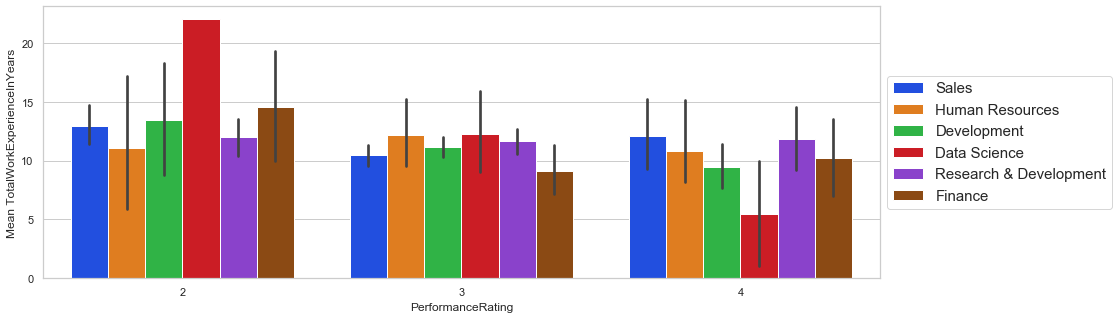

In [121]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(y="TotalWorkExperienceInYears", x="PerformanceRating", hue="EmpDepartment", data=df, estimator=np.mean,palette='bright')
ax.set(ylabel="Mean TotalWorkExperienceInYears")
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

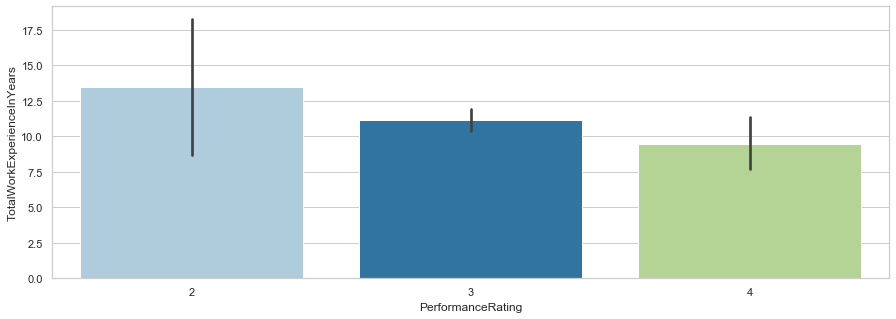

In [62]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', 
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
#plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)hue="EmpJobRole",

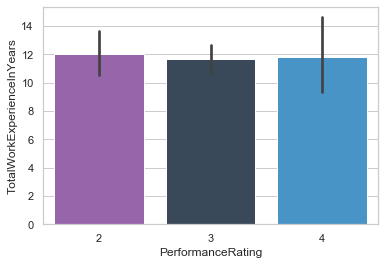

In [63]:
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)

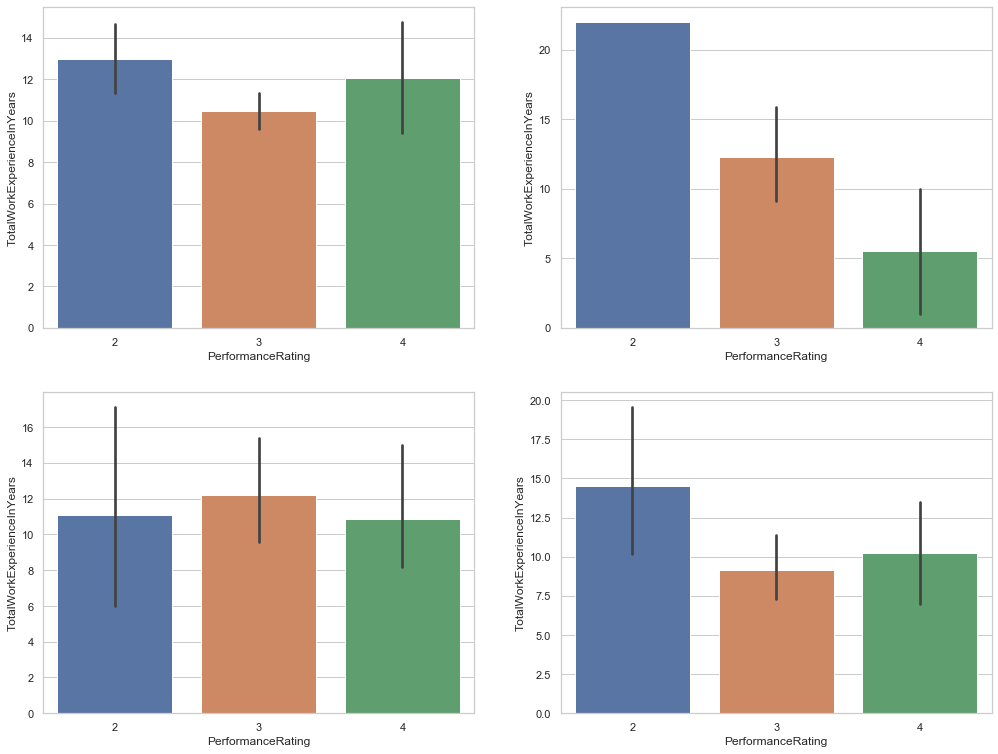

In [64]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0])

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', 
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', 
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])


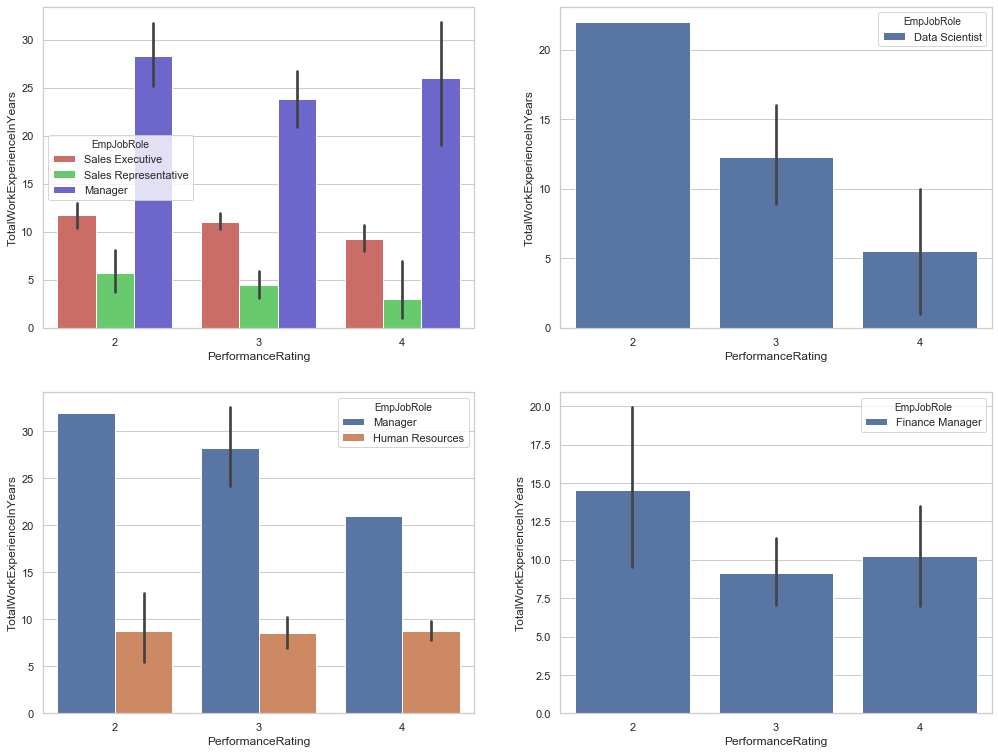

In [65]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

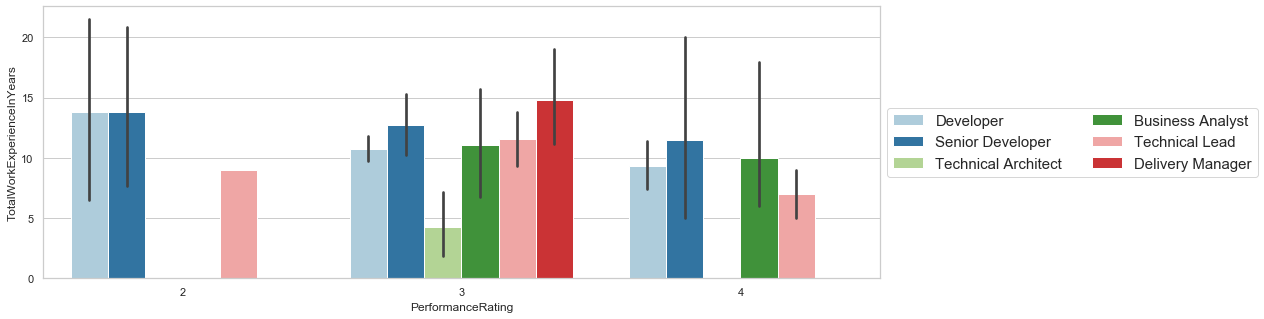

In [66]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

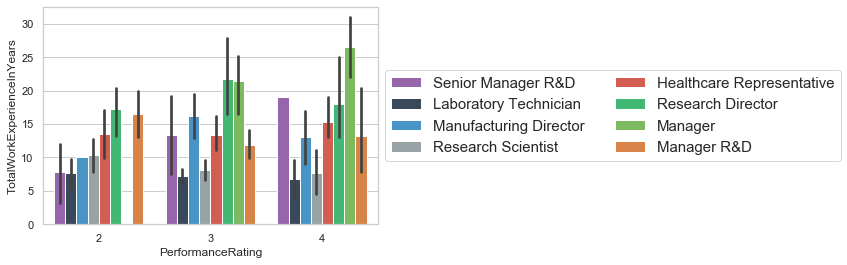

In [67]:
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y="TotalWorkExperienceInYears",x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

#### Key Observations:
- Mean **'TotalWorkExperienceInYears'** of all the Employees of INX Future Inc. is 11.23 years.
- A clear pattern observed in both of 'Development(30%) and 'Data Science'(1.6%) departments, is that as the PerformanceRating goes from 1,Good(16.6%) to 2,Excellent(72.8%) and then to 3,outstanding(11%), the mean **'TotalWorkExperienceInYears'** drops.
- Important observation to note here is that Overall mean **'TotalWorkExperienceInYears'** is highly dependable on Employee's JObRole.
- Generally, it is found that in each  department,**more the numbers of *'TotalWorkExperienceInYears'* less one's tends to perform well.**
- Definitly young minds outforms olders'.

### **7. EmpEducationLevel	  vs  PerformanceRating vs Department**
- There are Five Ratings given in **'EmpEducationLevel'** namely:-1 'Below College',2 'College',3 'Bachelor',4 'Master',5 'Doctor
- Out of these Five Ratings each Ratings in term of total employees accounts for:-1 'Below College'(12.3%),2 'College'(19.91%),3 'Bachelor'(37.41%),4 'Master'(27.6%),5 'Doctor(3.5%)
- Top Three categories in **'EmpEducationLevel'** 2'College'(19.91%),3 'Bachelor'(37.41%) and 4 'Master'(27.6%),that accounts for about 85% of the total workforce of INX Future Inc.

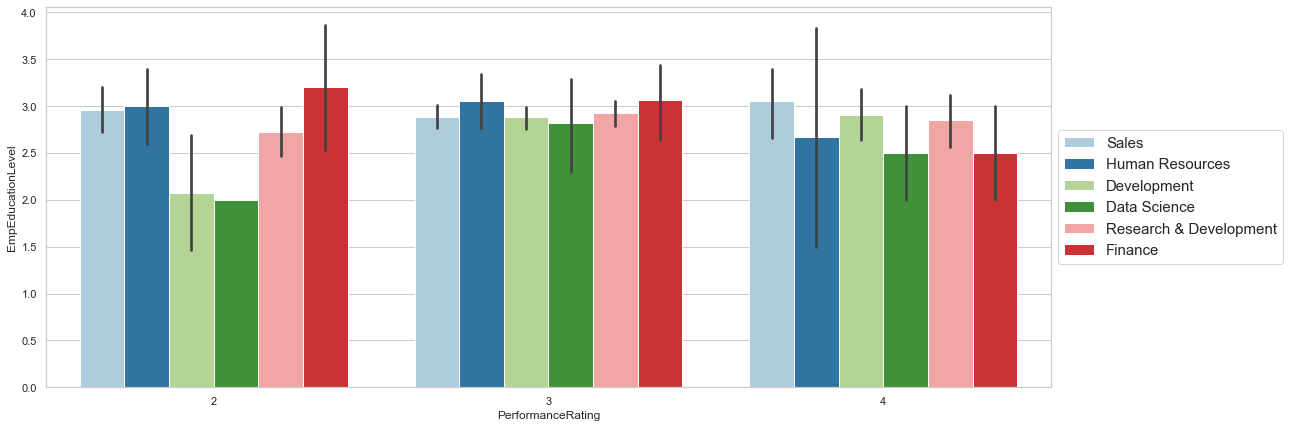

In [125]:
f, ax = plt.subplots(figsize=(18, 7))
sns.barplot(y='EmpEducationLevel',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

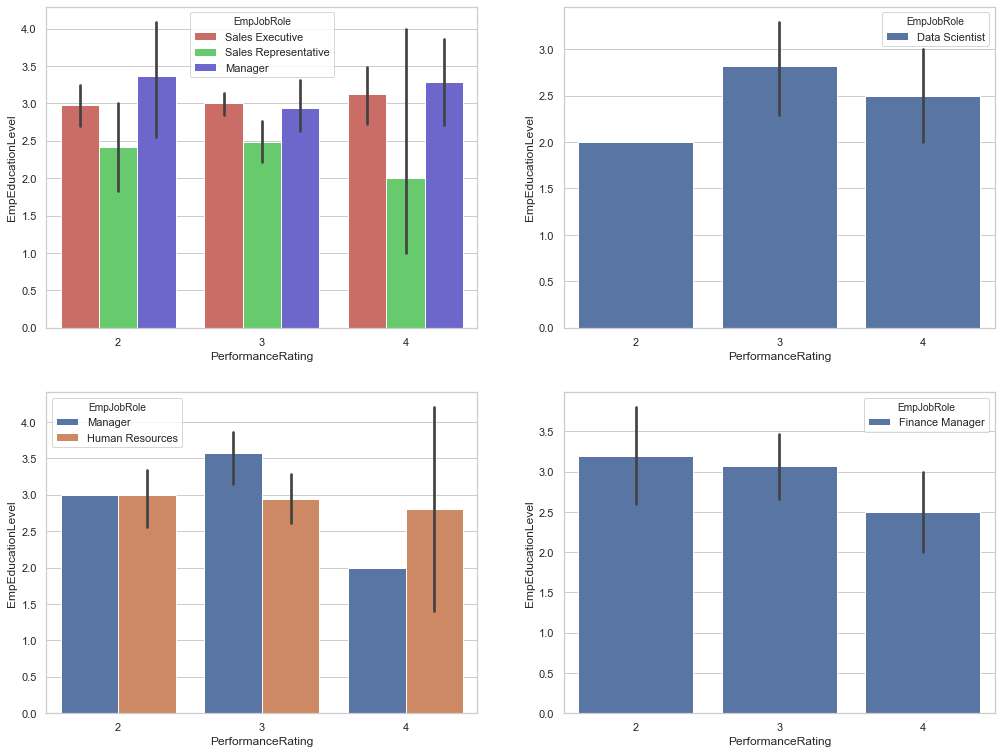

In [69]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y='EmpEducationLevel',x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls')

sns.barplot(y='EmpEducationLevel',x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y='EmpEducationLevel',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y='EmpEducationLevel',x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

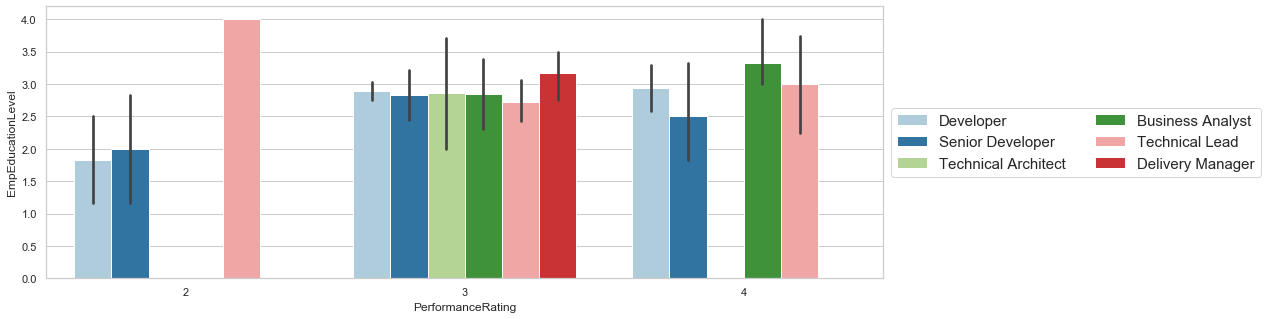

In [70]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpEducationLevel',x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired")
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

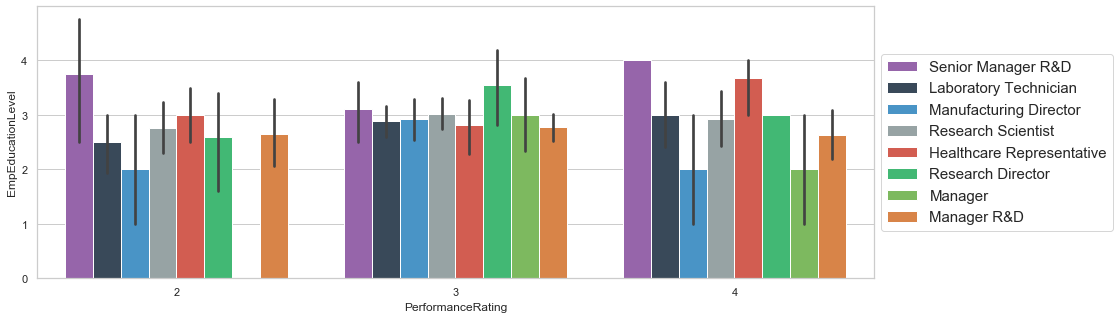

In [71]:
f, ax = plt.subplots(figsize=(15, 5))
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y='EmpEducationLevel',x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui)
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

In [72]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['EmpEducationLevel']]

EmpEducationLevel      
                                                      mean count
PerformanceRating EmpDepartment                                 
2                 Data Science                    2.000000     1
                  Development                     2.076923    13
                  Finance                         3.200000    15
                  Human Resources                 3.000000    10
                  Research & Development          2.720588    68
                  Sales                           2.954023    87
3                 Data Science                    2.823529    17
                  Development                     2.878289   304
                  Finance                         3.066667    30
                  Human Resources                 3.052632    38
                  Research & Development          2.923077   234
                  Sales                           2.884462   251
4                 Data Science                    2.500000     2
                  Development                     2.909091    44
                  Finance                         2.500000     4
                  Human Resources                 2.666667     6
                  Research & Development          2.853659    41
                  Sales                           3.057143    35

In [73]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['EmpEducationLevel']]

EmpEducationLevel      
                                                      mean count
PerformanceRating EmpDepartment                                 
2                 Data Science                    2.000000     1
                  Development                     2.076923    13
                  Finance                         3.200000    15
                  Human Resources                 3.000000    10
                  Research & Development          2.720588    68
                  Sales                           2.954023    87
3                 Data Science                    2.823529    17
                  Development                     2.878289   304
                  Finance                         3.066667    30
                  Human Resources                 3.052632    38
                  Research & Development          2.923077   234
                  Sales                           2.884462   251
4                 Data Science                    2.500000     2
                  Development                     2.909091    44
                  Finance                         2.500000     4
                  Human Resources                 2.666667     6
                  Research & Development          2.853659    41
                  Sales                           3.057143    35

#### Key Observations:
- It is observed that Employee's **EmpEducationLevel** is very dependable on his/her JobRole.
-  As the PerformanceRating of all the departments climbs from 1,Good(16.6%) to 2,Excellent(72.8%) (both these ratings accounts for approx. 90% of the total workforce of the INX Future Inc.),there is increase in their **EmpEducationLevel**. (ignoring the very minute decrease in case of 'Sales Dept'(31%) and 'Finance'(4%) drpartment).And we can reasonably generalise it.
- One clear inference from this analysis is that **EmpEducationLevel and PerformanceRating** have shown positive correlation between them.
- Hence, one's **EmpEducationLevel** proves to be one of the key indicators in deciding one's ** PerformanceRating**

### **8. EmpJobInvolvement	vs  PerformanceRating vs Department**
- There are Five Ratings given in  EmpJobInvolvement Index namely:- 1(Low),2(Medium),3(High),4(Very High)
- Of these Five Ratings each Ratings accounts in term total employess are:- Low(5.83%),Medium(24.50%),High(60.33%),Very High(9.58%)

In [74]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['EmpJobInvolvement']]

EmpJobInvolvement      
                                                      mean count
PerformanceRating EmpDepartment                                 
2                 Data Science                    3.000000     1
                  Development                     3.000000    13
                  Finance                         3.000000    15
                  Human Resources                 2.800000    10
                  Research & Development          2.779412    68
                  Sales                           2.563218    87
3                 Data Science                    2.941176    17
                  Development                     2.792763   304
                  Finance                         2.800000    30
                  Human Resources                 2.789474    38
                  Research & Development          2.670940   234
                  Sales                           2.725100   251
4                 Data Science                    2.500000     2
                  Development                     2.704545    44
                  Finance                         3.000000     4
                  Human Resources                 2.666667     6
                  Research & Development          2.609756    41
                  Sales                           2.685714    35

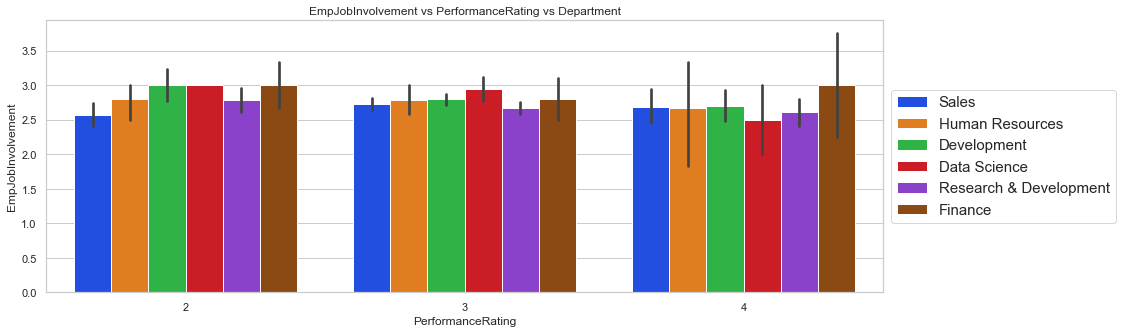

In [126]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='bright').set_title('EmpJobInvolvement vs PerformanceRating vs Department')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

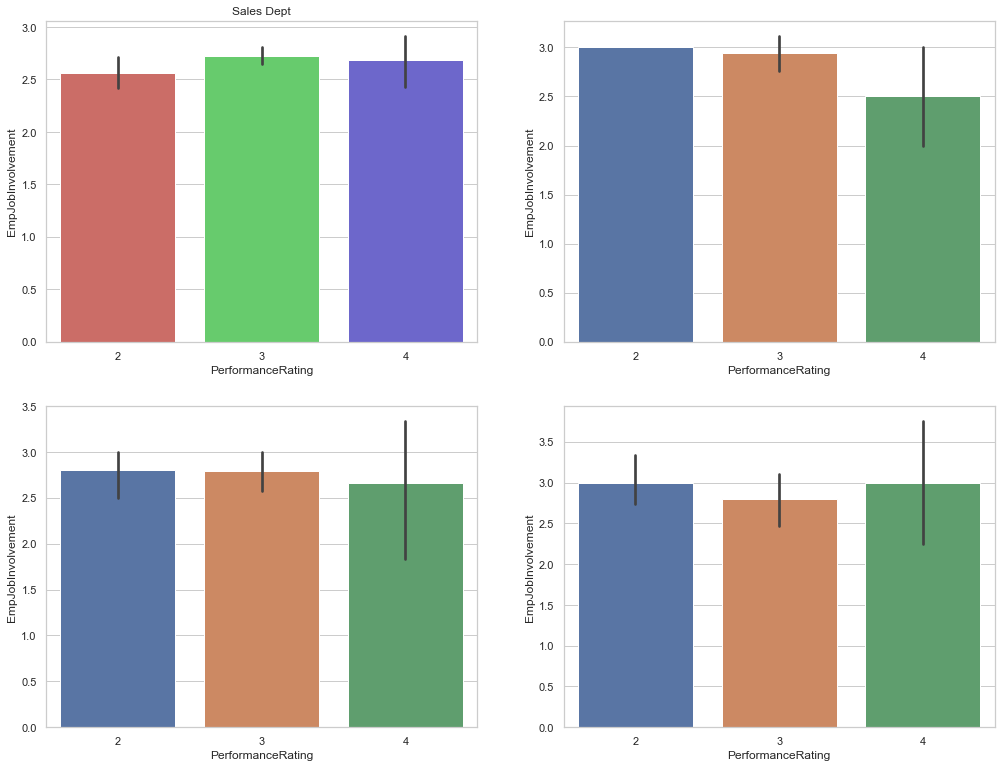

In [76]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls').set_title('Sales Dept')

sns.barplot(y='EmpJobInvolvement',x='PerformanceRating', #hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',#hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

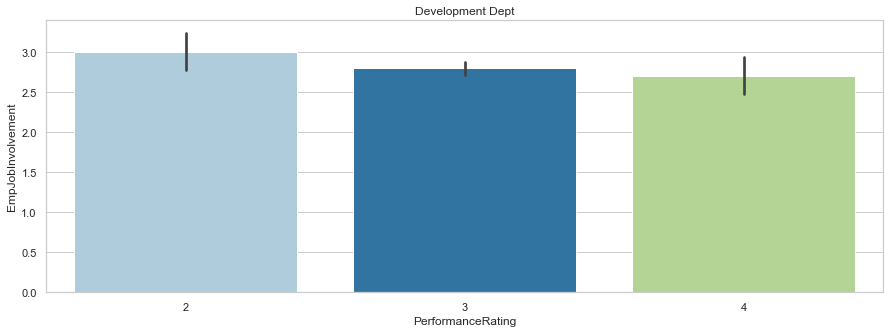

In [77]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating', #hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired").set_title('Development Dept')
legend_x = 1
legend_y = .5
#plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

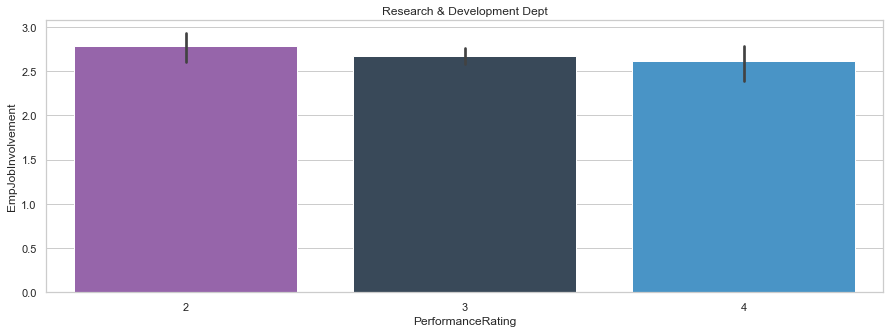

In [78]:
f, ax = plt.subplots(figsize=(15, 5))
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui).set_title('Research & Development Dept')
legend_x = 1
legend_y = .5
#plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

### Key Observations:
- When PerformanceRating index increased from 1,Good(16.6%) to 2,Excellent(72.8%) except **Sales Dept(31%)** all other departments seems to have decline in **EmpJobInvolvement**
- And Similary, when PerformanceRating index increased from 2,Excellent(72.8%) to 3,Outstanding(11%) except **'Finance'(4%)** all other departments seems to have decline in **EmpJobInvolvement**
- Hence, we can say that **EmpJobInvolvement is inversely propotional to PerformanceRating** and can be used as a feature in deciding one's ** PerformanceRating**.

### **9. EmpRelationshipSatisfaction	vs  PerformanceRating vs Department**
- There are Five Ratings given in EmpRelationshipSatisfaction Index namely:- 1(Low),2(Medium),3(High),4(Very High)
- Of these Five Ratings each Ratings in term total employess accounts for:- Low(18.25%),Medium(20.58%),High(31.58%),Very High(29.58%)

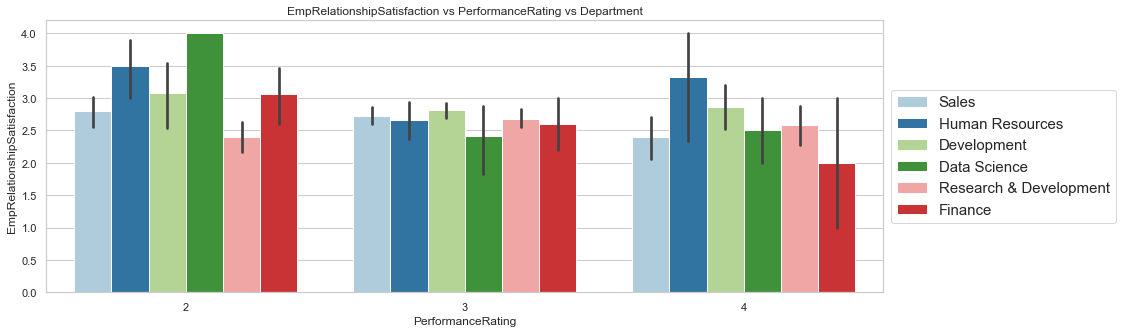

In [127]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpRelationshipSatisfaction',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='Paired').set_title('EmpRelationshipSatisfaction vs PerformanceRating vs Department')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

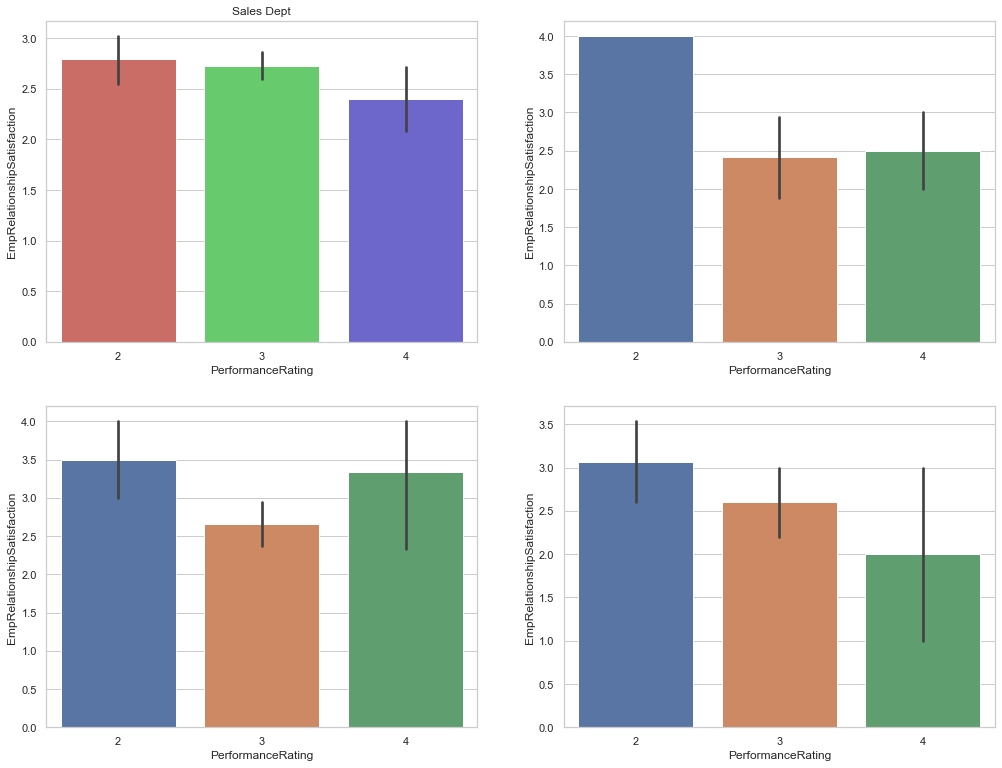

In [80]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y='EmpRelationshipSatisfaction',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls').set_title('Sales Dept')

sns.barplot(y='EmpRelationshipSatisfaction',x='PerformanceRating', #hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y='EmpRelationshipSatisfaction',x='PerformanceRating',#hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y='EmpRelationshipSatisfaction',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

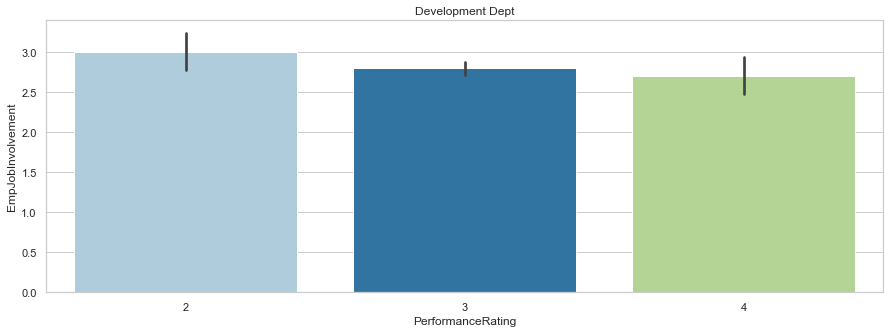

In [81]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating', #hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired").set_title('Development Dept')
legend_x = 1
legend_y = .5
#plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

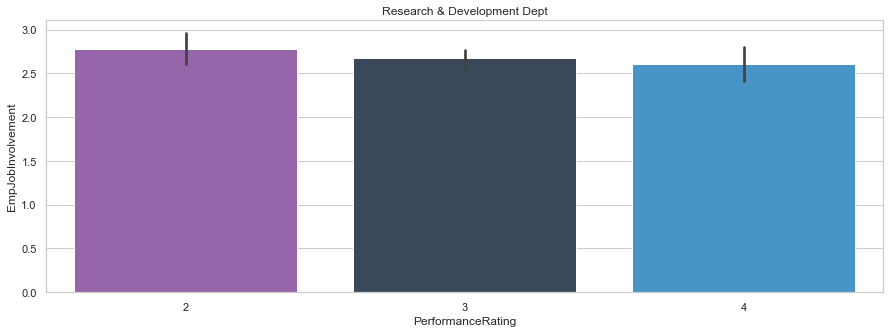

In [82]:
f, ax = plt.subplots(figsize=(15, 5))
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y='EmpJobInvolvement',x='PerformanceRating',#hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui).set_title('Research & Development Dept')
legend_x = 1
legend_y = .5
#plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

In [83]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['EmpJobInvolvement']]

EmpJobInvolvement      
                                                      mean count
PerformanceRating EmpDepartment                                 
2                 Data Science                    3.000000     1
                  Development                     3.000000    13
                  Finance                         3.000000    15
                  Human Resources                 2.800000    10
                  Research & Development          2.779412    68
                  Sales                           2.563218    87
3                 Data Science                    2.941176    17
                  Development                     2.792763   304
                  Finance                         2.800000    30
                  Human Resources                 2.789474    38
                  Research & Development          2.670940   234
                  Sales                           2.725100   251
4                 Data Science                    2.500000     2
                  Development                     2.704545    44
                  Finance                         3.000000     4
                  Human Resources                 2.666667     6
                  Research & Development          2.609756    41
                  Sales                           2.685714    35

### Key Observations:
- **EmpRelationshipSatisfaction** seems have very fairly distributed among all the Employees in all its Rating segments.
- When **EmpRelationshipSatisfaction** is observed for the Employees of all department from 1Good(16.6%) to 2Excellent(72.8%) **PerformanceRating** , it is found that except for  **'Research & Development'(28.6%)** department, there is considerable degree of decline **EmpRelationshipSatisfaction** rating.
- Since  1Good(16.6%) and  2Excellent(72.8%) PerformanceRating accounts for more than 98% of total PerformanceRating Profile, it is not wrong to say that overall more the Employee is high in the ladder of **EmpRelationshipSatisfaction** Ratings,less he tends to performs.

### 10. Age vs PerformanceRating vs Department

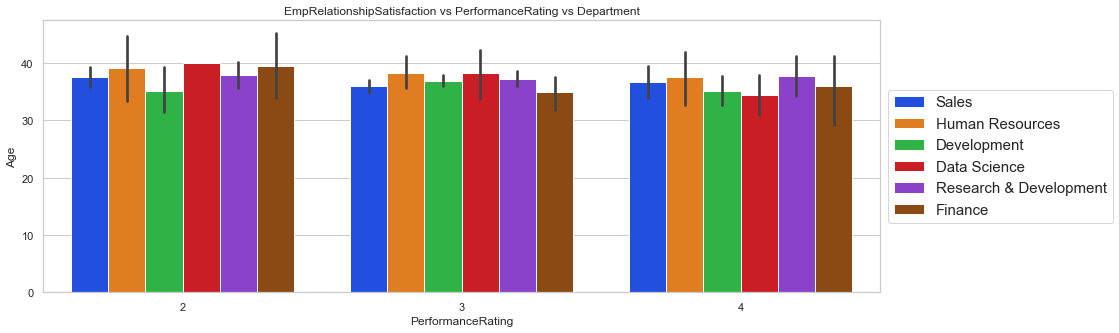

In [84]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='Age',x='PerformanceRating',hue="EmpDepartment", 
            data=df,estimator=np.mean,palette='bright').set_title('EmpRelationshipSatisfaction vs PerformanceRating vs Department')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

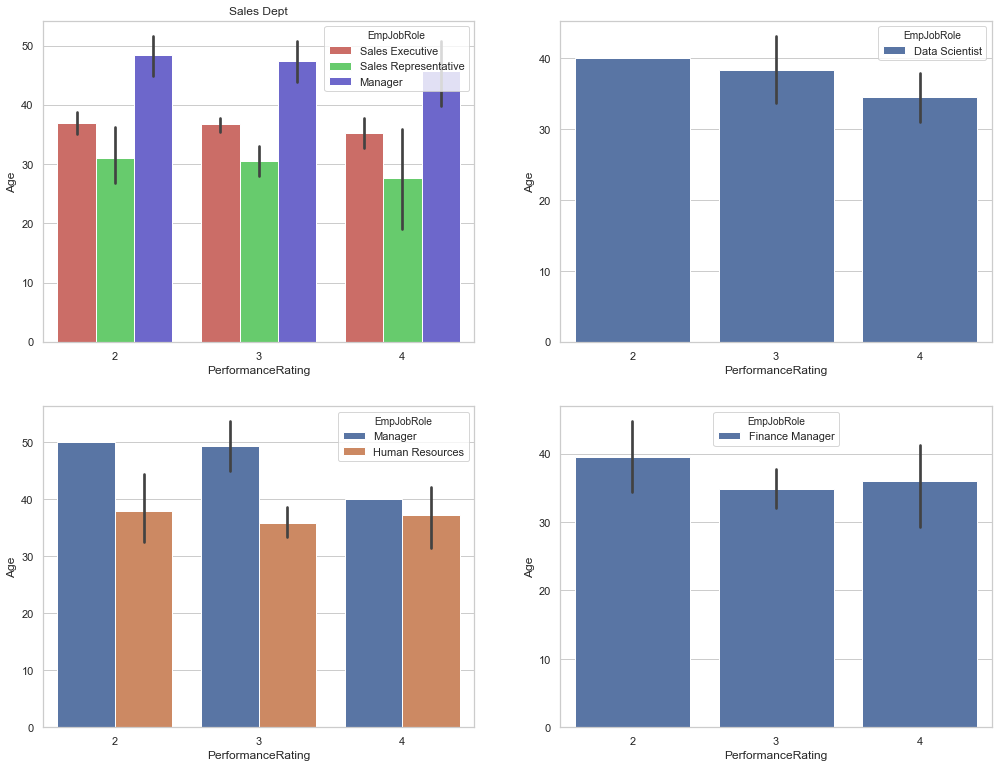

In [85]:
f, axes = plt.subplots(ncols=2, figsize=(17, 13),nrows=2, sharex=False,squeeze=True)

sns.barplot(y='Age',x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Sales'],estimator=np.mean,ax=axes[0,0],palette = 'hls').set_title('Sales Dept')

sns.barplot(y='Age',x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Human Resources'],estimator=np.mean,ax=axes[1,0])
sns.barplot(y='Age',x='PerformanceRating',hue="EmpJobRole", 
            data=df[df["EmpDepartment"]=='Data Science'],estimator=np.mean,ax=axes[0,1])

sns.barplot(y='Age',x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Finance'],estimator=np.mean,ax=axes[1,1])

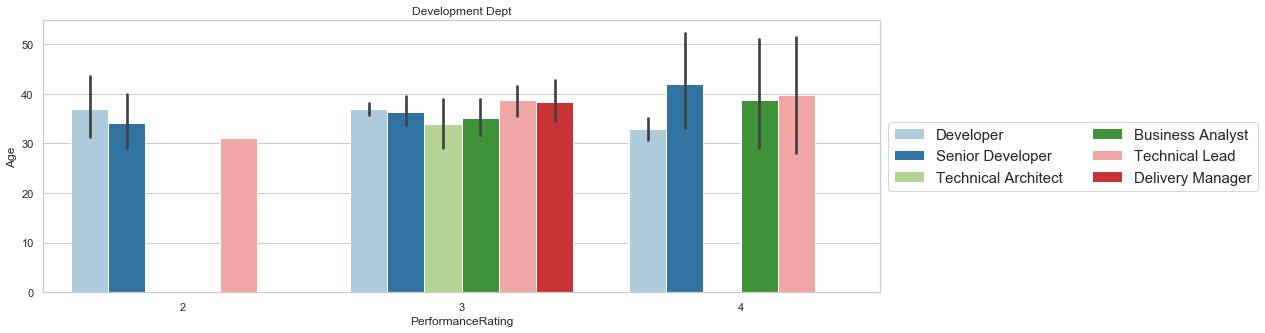

In [86]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='Age',x='PerformanceRating', hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Development'],estimator=np.mean,palette="Paired").set_title('Development Dept')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=2,fontsize=15)

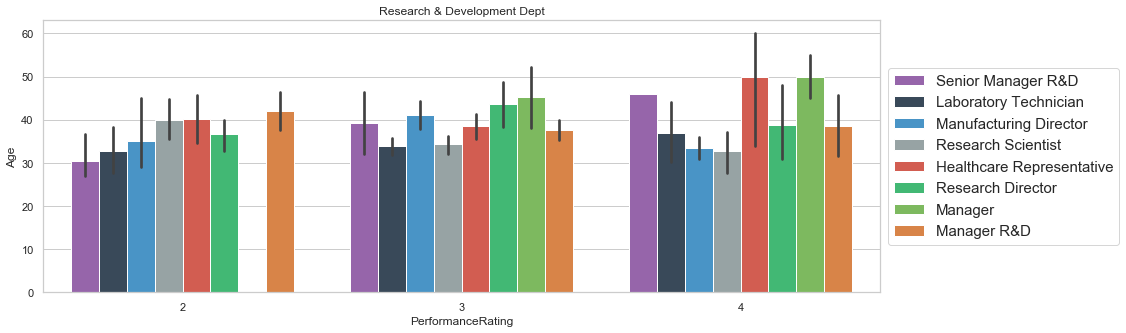

In [87]:
f, ax = plt.subplots(figsize=(15, 5))
flatui = ["#9b59b6","#34495e", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71",'#78C850','#F08030']
sns.barplot(y='Age',x='PerformanceRating',hue="EmpJobRole",
            data=df[df["EmpDepartment"]=='Research & Development'],estimator=np.mean,palette = flatui).set_title('Research & Development Dept')
legend_x = 1
legend_y = .5
plt.legend( loc='center left', bbox_to_anchor=(legend_x, legend_y),ncol=1,fontsize=15)

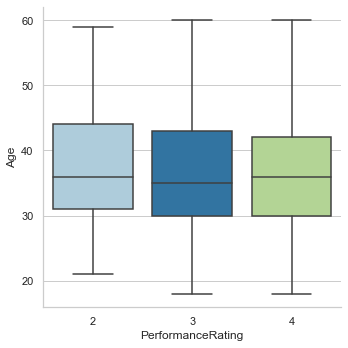

In [128]:
sns.catplot(data=df,y='Age',x='PerformanceRating',height=5,aspect=1,kind='box',palette="Paired")

In [89]:
df.groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['Age']]

Age      
                                               mean count
PerformanceRating EmpDepartment                          
2                 Data Science            40.000000     1
                  Development             35.153846    13
                  Finance                 39.466667    15
                  Human Resources         39.100000    10
                  Research & Development  38.014706    68
                  Sales                   37.574713    87
3                 Data Science            38.294118    17
                  Development             36.927632   304
                  Finance                 34.900000    30
                  Human Resources         38.368421    38
                  Research & Development  37.282051   234
                  Sales                   36.031873   251
4                 Data Science            34.500000     2
                  Development             35.204545    44
                  Finance                 36.000000     4
                  Human Resources         37.666667     6
                  Research & Development  37.682927    41
                  Sales                   36.714286    35

In [90]:
df[df["EmpDepartment"]=='Sales'].groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['Age']]

Age      
                                      mean count
PerformanceRating EmpDepartment                 
2                 Sales          37.574713    87
3                 Sales          36.031873   251
4                 Sales          36.714286    35

In [91]:
df[df["EmpDepartment"]=='Sales'].groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['Age']]

Age      
                                      mean count
PerformanceRating EmpDepartment                 
2                 Sales          37.574713    87
3                 Sales          36.031873   251
4                 Sales          36.714286    35

In [92]:
df[df["EmpDepartment"]=='Research & Development'].groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['Age']]

Age      
                                               mean count
PerformanceRating EmpDepartment                          
2                 Research & Development  38.014706    68
3                 Research & Development  37.282051   234
4                 Research & Development  37.682927    41

In [93]:
df[df["EmpDepartment"]=='Development'].groupby(['PerformanceRating','EmpDepartment']).agg(['mean','count'])[['Age']]

Age      
                                      mean count
PerformanceRating EmpDepartment                 
2                 Development    35.153846    13
3                 Development    36.927632   304
4                 Development    35.204545    44

In [94]:
df.groupby(['PerformanceRating']).agg(['mean','count'])[['Age']]

Age      
                        mean count
PerformanceRating                 
2                  37.804124   194
3                  36.784897   874
4                  36.500000   132

In [95]:
df.Age.mean()

36.91833333333334

In [96]:
print(df.Age.skew())
print(df.Age.kurt())

0.38414495910435587
-0.4309995807632232


### Key Observations:
- Mean **Age** of total workforce of INX Future Inc. is 36.91 years.
- Although, **Age** is some what susceptible one's EmpJobRole but if we see the greater picture we can definitely says that younger Employees are tends to perform better than olders'.

### 11. OverTime vs EmpDepartment vs PerformanceRating

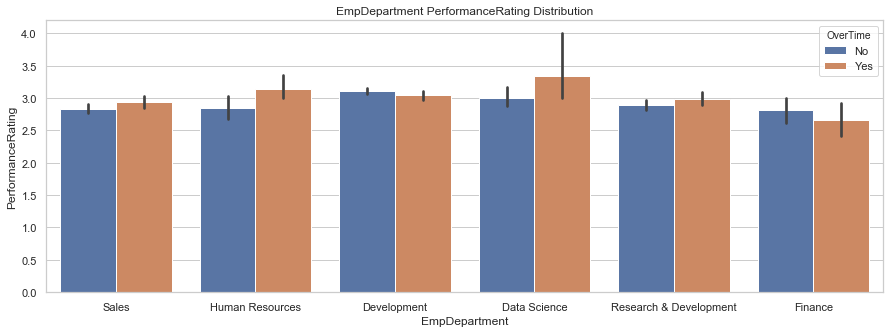

In [97]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="EmpDepartment",y='PerformanceRating', hue="OverTime", data=df)
ax.set_title('EmpDepartment PerformanceRating Distribution');

sns.set(style="whitegrid")

### Key Observations:
- In almost all departments(expect 'Development(30%) & Finance (4.5%)),Employees who had positive OverTime tends to have higher PerformanceRating.
- Hence, we can say that OverTime plays an important role in deciding one's PerformanceRating.

# Step 6 : Analysing some of important Variables with respect to Performance

In [98]:
df.head(1)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3


### 1. 'DistanceFromHome' vs 'PerformanceRating'

Text(0.5, 1.0, 'DistanceFromHome Distribution - PerformanceRating')

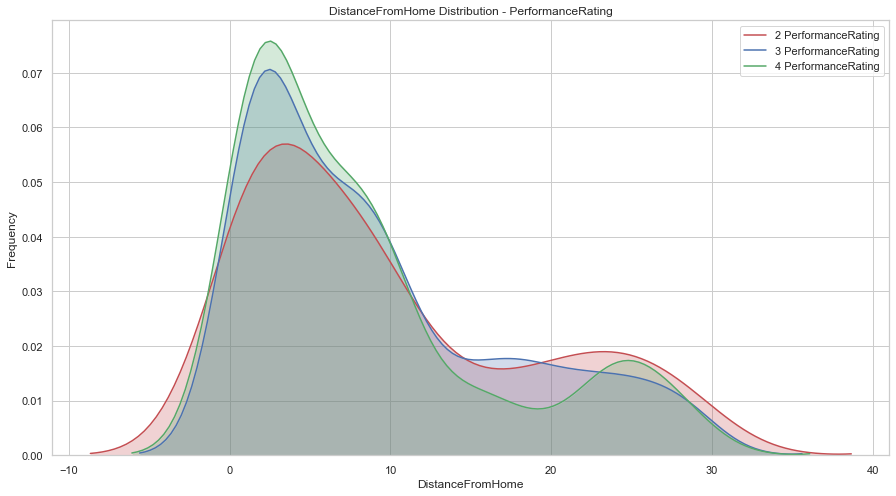

In [99]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"DistanceFromHome"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"DistanceFromHome"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"DistanceFromHome"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel='DistanceFromHome', ylabel='Frequency')
plt.title('DistanceFromHome Distribution - PerformanceRating')

### Key Observations:
- There is a Bi-modal PerformanceRating distribution (for all the three ratings) for the employees of INX Future Inc.,
- Employees who had less DistanceFromHome (less than~10 distance units) tends to have higher PerformanceRating.
- Employees who had too many hours of work (greater than ~10 distance units) tends to have low PerformanceRating.
- It might be not wrong to say that Employees who live close to their Company, able to manage their personal and professional life balance better since they get more time to spend with their family than who live farther.

### 2. Age vs PerformanceRating

Text(0.5, 1.0, 'Age Distribution - PerformanceRating')

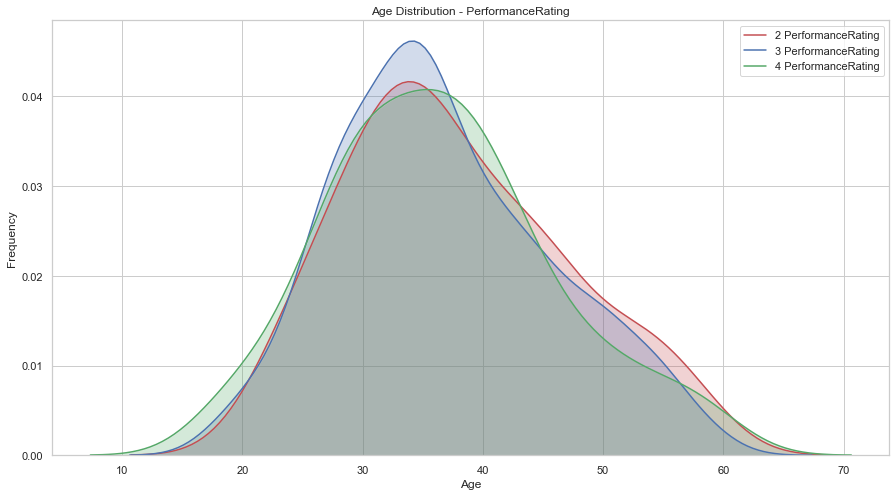

In [100]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"Age"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"Age"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"Age"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age Distribution - PerformanceRating')

### Key Observations:
- As we have seen earlier, younger minds tends to perform higher than older one's

### 3. 'EmpHourlyRate' vs 'PerformanceRating'

Text(0.5, 1.0, 'EmpHourlyRate Distribution - PerformanceRating')

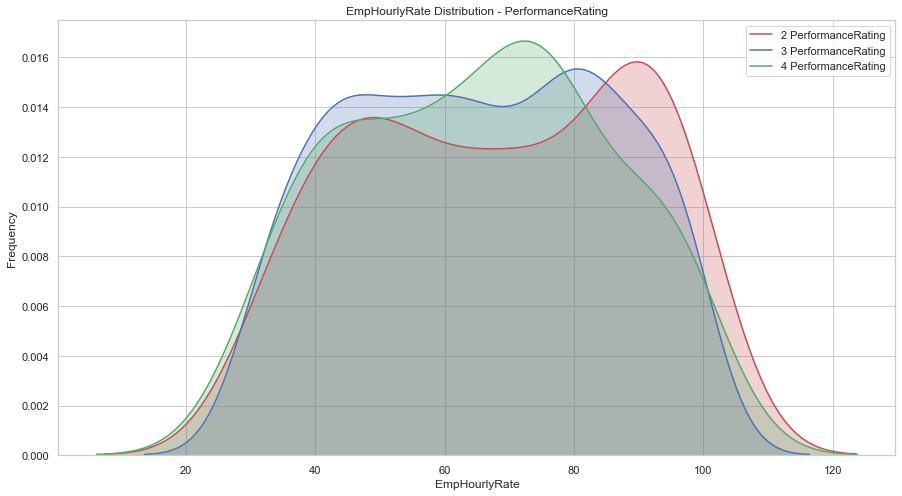

In [101]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"EmpHourlyRate"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"EmpHourlyRate"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"EmpHourlyRate"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel='EmpHourlyRate', ylabel='Frequency')
plt.title('EmpHourlyRate Distribution - PerformanceRating')

### Key Observations:
- Employees who had EmpHourlyRate (in range between 45 - 78) tends to have higher PerformanceRating.
- Employees who had EmpHourlyRate (greater than 78) tends to have lower PerformanceRating.

### 4.NumCompaniesWorked vs PerformanceRating

Text(0.5, 1.0, 'NumCompaniesWorked Distribution - PerformanceRating')

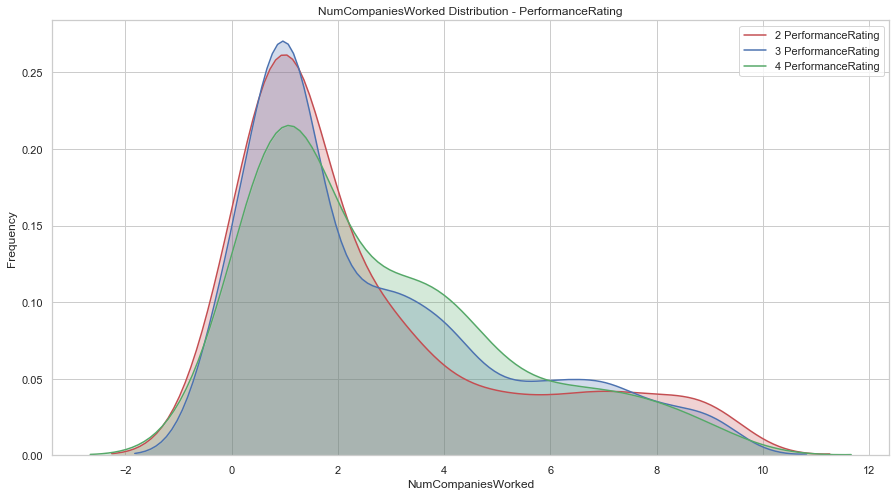

In [102]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"NumCompaniesWorked"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"NumCompaniesWorked"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"NumCompaniesWorked"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel="NumCompaniesWorked", ylabel='Frequency')
plt.title('NumCompaniesWorked Distribution - PerformanceRating')

### Key Observations:
- There is sweet spot for employees that have performed well, ( 2<NumCompaniesWorked<6 )
- This sweet spot can be explained as, at this sweet spot Employees has right blend of  Age and Experience, that enable them to perform better.

### 5."TotalWorkExperienceInYears" vs 'PerformanceRating'

Text(0.5, 1.0, 'TotalWorkExperienceInYears Distribution - PerformanceRating')

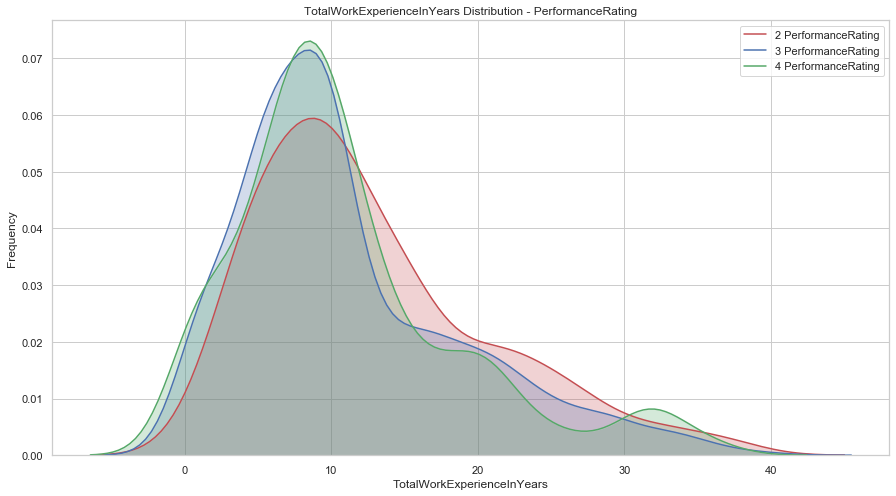

In [130]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"TotalWorkExperienceInYears"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"TotalWorkExperienceInYears"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"TotalWorkExperienceInYears"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel='TotalWorkExperienceInYears', ylabel='Frequency')
plt.title('TotalWorkExperienceInYears Distribution - PerformanceRating')

### Key Observations:
- There is a multi-modal PerformanceRating distribution (for all the three ratings) for the employees of INX Future Inc.,
- Overall, Employees who had **less than ~14 years TotalWorkExperienceInYears  tends to have higher PerformanceRating**.
- It is also observed that Employees who had **greater than ~31 years TotalWorkExperienceInYears seems to perform somewhat good but there frequency is quite low. It may possible that for some domains higer 

### 6."YearsSinceLastPromotion" vs 'PerformanceRating'

Text(0.5, 1.0, 'YearsSinceLastPromotion Distribution - PerformanceRating')

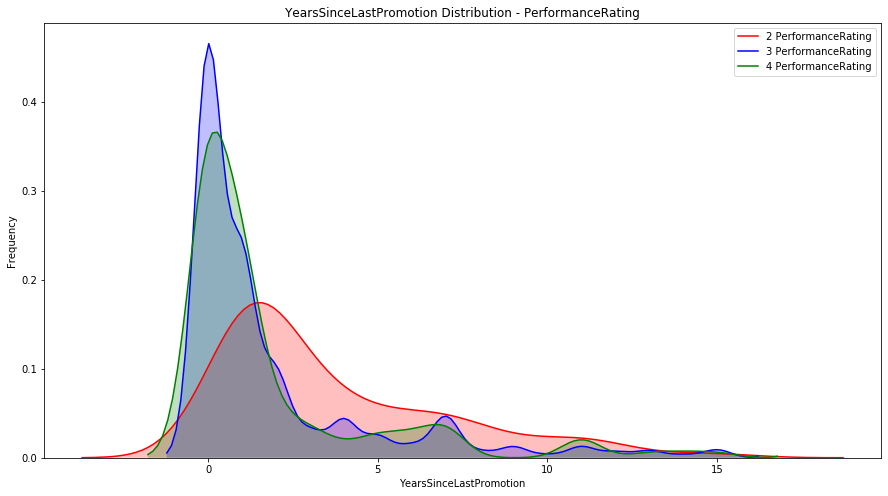

In [7]:
# Kernel Density Plot'PerformanceRating'
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 2),"YearsSinceLastPromotion"] , color='r',shade=True,label='2 PerformanceRating')
ax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 3),"YearsSinceLastPromotion"] , color='b',shade=True, label='3 PerformanceRating')
aax=sns.kdeplot(df.loc[(df['PerformanceRating'] == 4),"YearsSinceLastPromotion"] , color='g',shade=True, label='4 PerformanceRating')
ax.set(xlabel='YearsSinceLastPromotion', ylabel='Frequency')
plt.title('YearsSinceLastPromotion Distribution - PerformanceRating')

### Key Observations:
- Earlier it is found that in each department, more the numbers of YearsSinceLastPromotion more ones tend to perform low.Similar trends prove to be right here.
- If an employee has less than 2 YearsSinceLastPromotion, he is more likely to perform well than others.